# **ACCIDENTES, FALLAS Y SECUESTROS DE AERONAVES**

* *el csv archivo fue descargado de Kaggle y subido a una cuenta Google Drive personal que se encuentra en el siguiente siguiente link:*
[*Aircraft Inicident Dataset*](https://drive.google.com/file/d/1WrnGcWClZBeUkcIT_erMRAeBTzCmxmL-/view?usp=sharing)

## **DATA WRANGLING**

A continuación llevaremos a la práctica lo visto en las clases de Data Wrangling.

Comenzamos importando las librerías a utilizar.

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1WrnGcWClZBeUkcIT_erMRAeBTzCmxmL-'
df = pd.read_csv(url, index_col=2)
df.head()

,Incident_Date,Aircaft_Model,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,Time,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
Aircaft_Registration,,,,,,,,,,,,,,,,,,,,,
ZS-NRJ,03-JAN-2022,British Aerospace 4121 Jetstream 41,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,08:10,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
HR-AYY,04-JAN-2022,British Aerospace 3101 Jetstream 31,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,ca 12:00,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
EP-CAP,05-JAN-2022,Boeing 737-4H6,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,17:07,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
RA-64032,08-JAN-2022,Tupolev Tu-204-100C,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,04:40,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
NaN,12-JAN-2022,Beechcraft 200 Super King Air,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,c. 02:00,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


### Exploramos el contenido.

In [ ]:
df.shape

(23519, 22)

In [ ]:
df.dtypes

Incident_Date           object
Aircaft_Model           object
Aircaft_Operator        object
Aircaft_Nature          object
Incident_Category       object
Incident_Cause(es)      object
Incident_Location       object
Aircaft_Damage_Type     object
Date                    object
Time                    object
Arit                    object
Aircaft_Engines         object
Onboard_Crew            object
Onboard_Passengers      object
Onboard_Total           object
Fatalities               int64
Aircaft_First_Flight    object
Aircraft_Phase          object
Departure_Airport       object
Destination_Airport     object
Ground_Casualties       object
Collision_Casualties    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23519 entries, ZS-NRJ to N123
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Incident_Date         23519 non-null  object
 1   Aircaft_Model         23519 non-null  object
 2   Aircaft_Operator      23519 non-null  object
 3   Aircaft_Nature        23519 non-null  object
 4   Incident_Category     23519 non-null  object
 5   Incident_Cause(es)    23519 non-null  object
 6   Incident_Location     22587 non-null  object
 7   Aircaft_Damage_Type   23519 non-null  object
 8   Date                  23519 non-null  object
 9   Time                  9203 non-null   object
 10  Arit                  23519 non-null  object
 11  Aircaft_Engines       10636 non-null  object
 12  Onboard_Crew          23519 non-null  object
 13  Onboard_Passengers    23519 non-null  object
 14  Onboard_Total         23519 non-null  object
 15  Fatalities            23519 non-null 

### Borramos duplicados

- el dataset contenía 290 filas duplicadas.

In [ ]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(23519, 22)
(23229, 22)


### Análisis de valores nulos, y estructuración del dataset

In [ ]:
df.isnull().sum()

Incident_Date               0
Aircaft_Model               0
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         867
Aircaft_Damage_Type         0
Date                        0
Time                    14041
Arit                        0
Aircaft_Engines         12624
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5281
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Ground_Casualties       22882
Collision_Casualties    22942
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

Incident_Date            0.000000
Aircaft_Model            0.000000
Aircaft_Operator         0.000000
Aircaft_Nature           0.000000
Incident_Category        0.000000
Incident_Cause(es)       0.000000
Incident_Location        3.732403
Aircaft_Damage_Type      0.000000
Date                     0.000000
Time                    60.445994
Arit                     0.000000
Aircaft_Engines         54.345861
Onboard_Crew             0.000000
Onboard_Passengers       0.000000
Onboard_Total            0.000000
Fatalities               0.000000
Aircaft_First_Flight    22.734513
Aircraft_Phase           0.000000
Departure_Airport        0.000000
Destination_Airport      0.000000
Ground_Casualties       98.506178
Collision_Casualties    98.764475
dtype: float64

In [ ]:
pd.set_option('display.max_rows', None)
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Collision_Casualties    98.764475
Ground_Casualties       98.506178
Time                    60.445994
Aircaft_Engines         54.345861
Aircaft_First_Flight    22.734513
Incident_Location        3.732403
dtype: float64

Visualizamos los nulos de forma gráfica.

<Axes: >

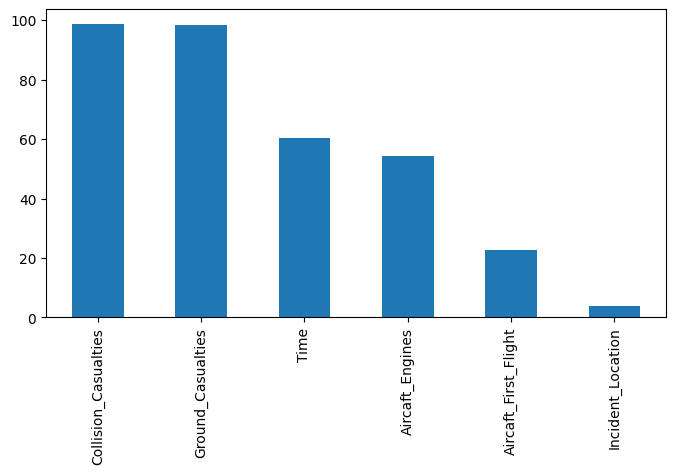

In [ ]:
plt.figure(figsize=(8,4))
serie.plot(kind='bar')

In [ ]:
pip install missingno

<Axes: >

<Figure size 600x400 with 0 Axes>

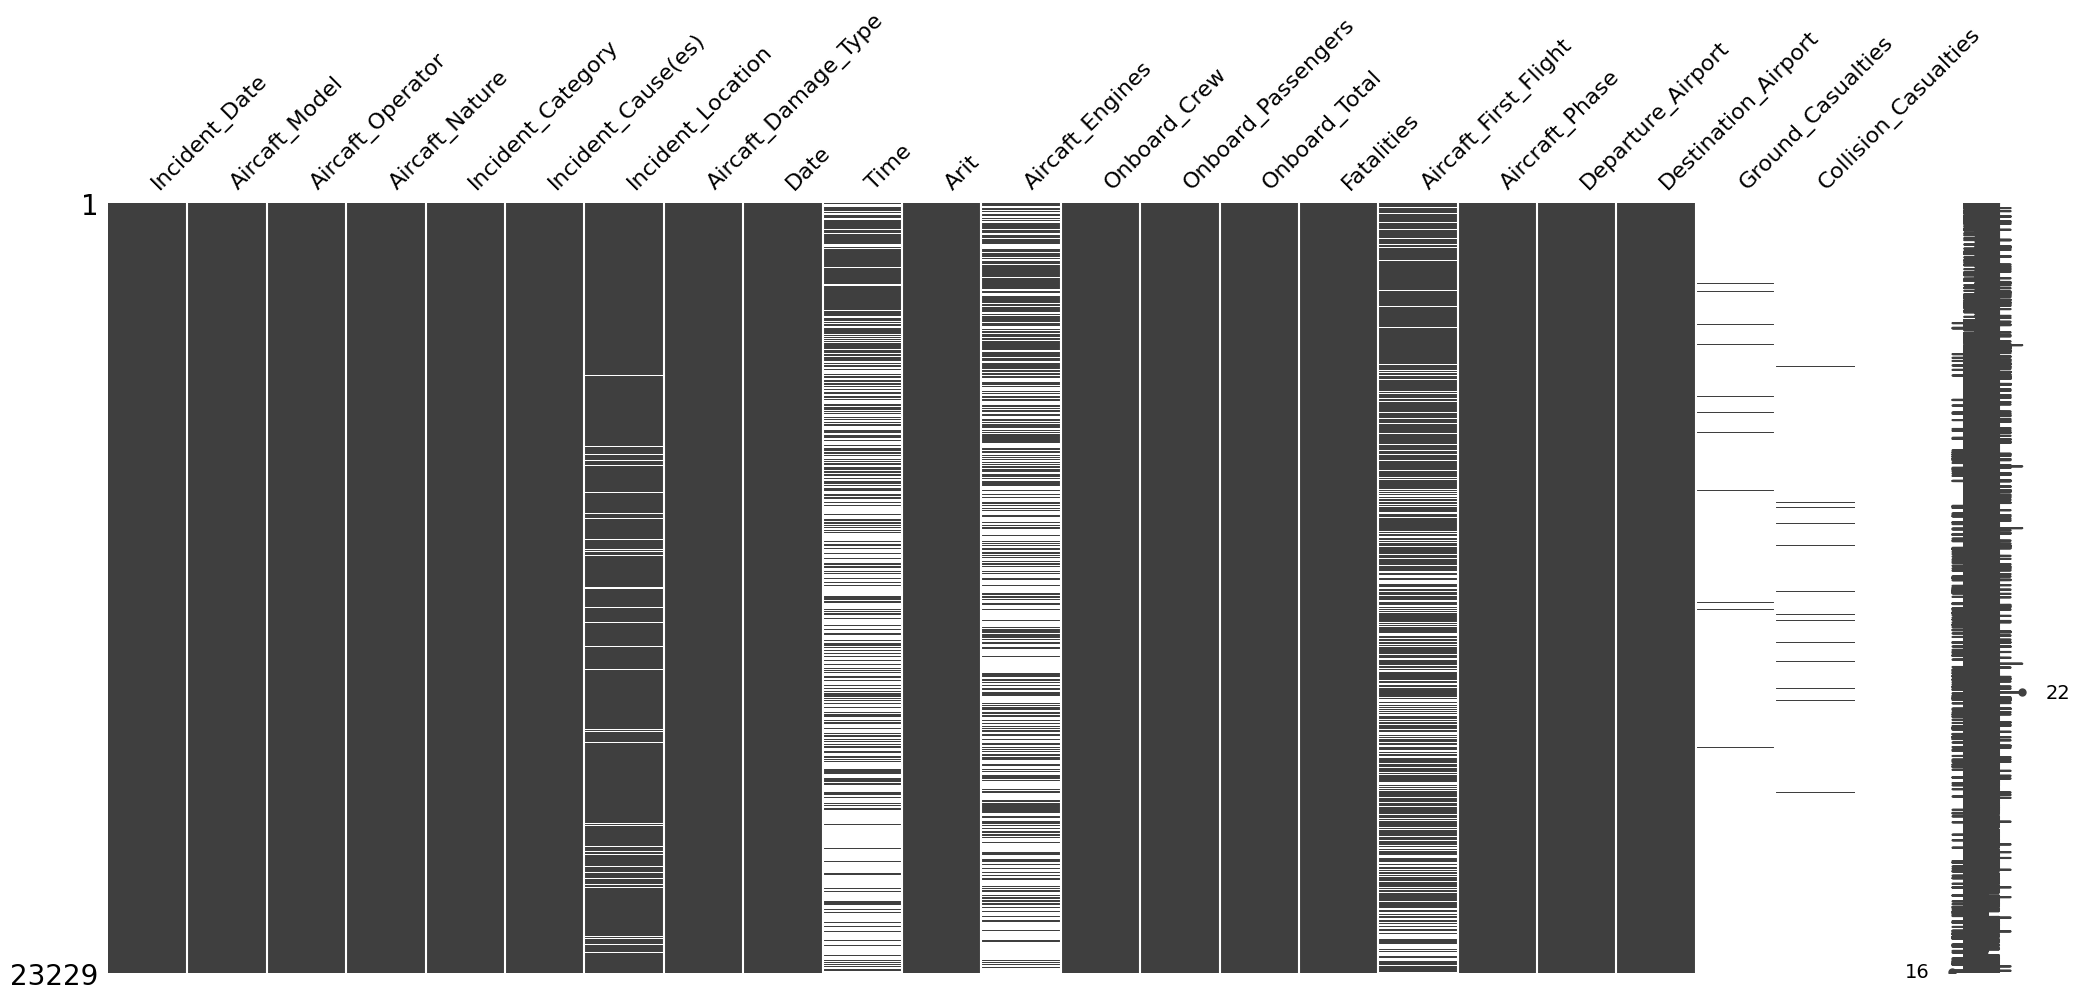

In [ ]:
import missingno as msno
plt.figure(figsize=(6, 4))
msno.matrix(df)

<Axes: >

<Figure size 600x400 with 0 Axes>

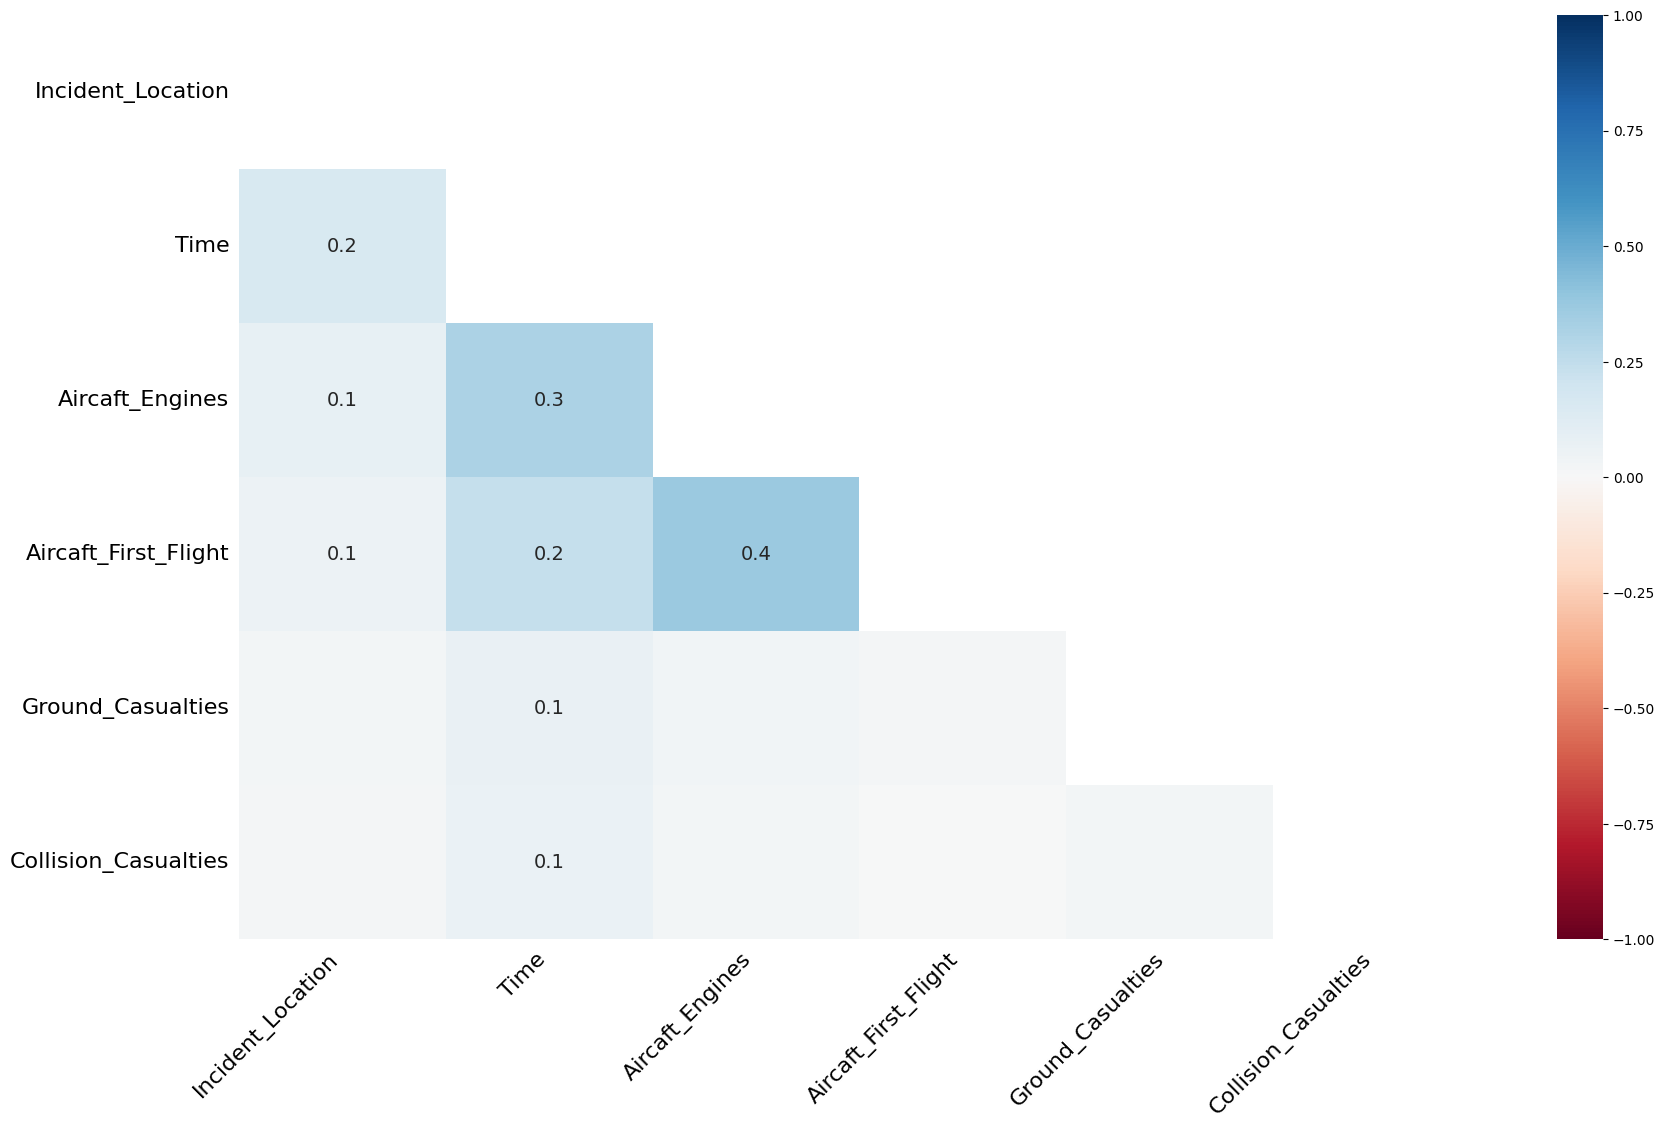

In [ ]:
plt.figure(figsize=(6, 4))
msno.heatmap(df)

<Axes: >

<Figure size 600x400 with 0 Axes>

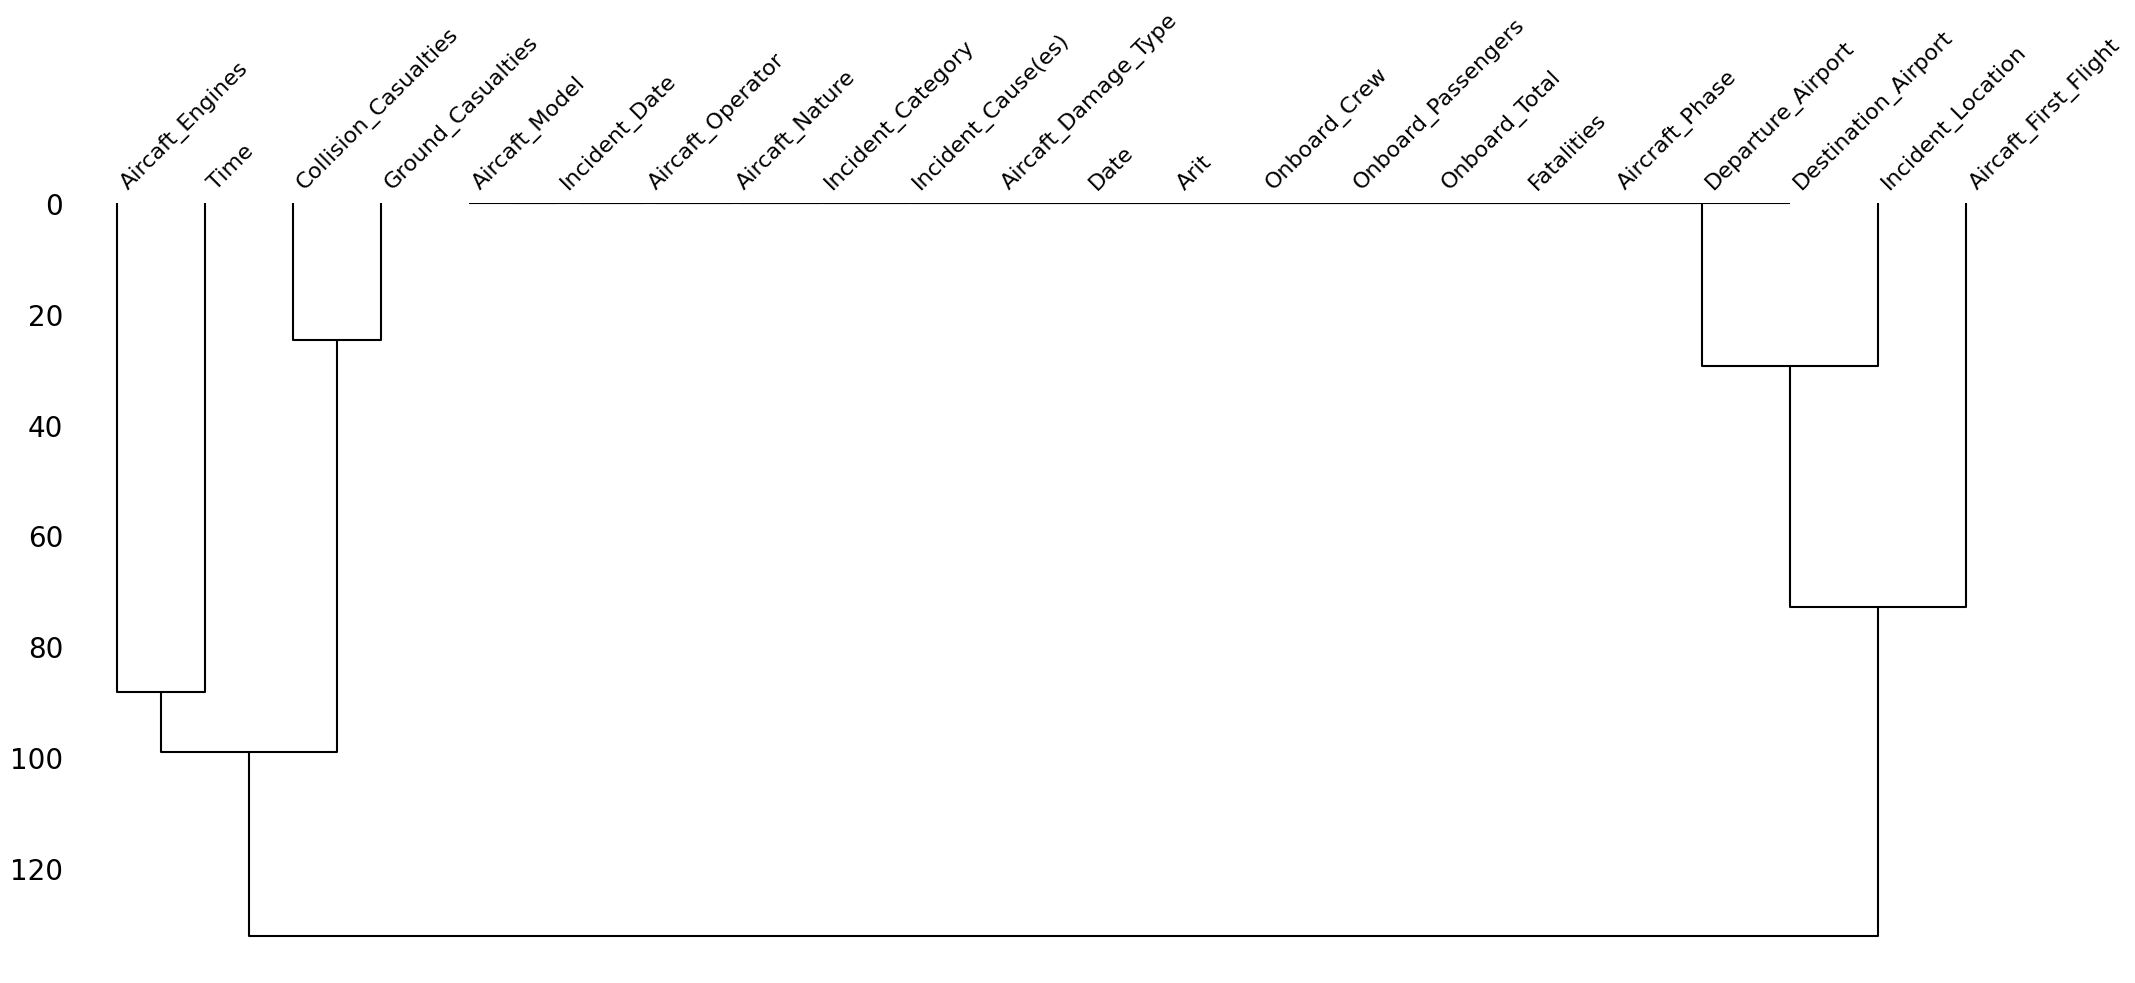

In [ ]:
plt.figure(figsize=(6, 4))
msno.dendrogram(df)

Hacemos una resumida visualización de los datos reales que contienen las 3 columnas con mayor porcentaje de nulos.

In [ ]:
values_collision_casualties = df['Collision_Casualties'].dropna()
values_ground_casualties = df['Ground_Casualties'].dropna()
values_time = df['Time'].dropna()


print(values_collision_casualties.head(20))
print(values_ground_casualties.head(20))
print(values_time.head(20))

Aircaft_Registration
N1116N        Fatalities: 1
N959PA        Fatalities: 5
N511AC        Fatalities: 2
N752RV        Fatalities: 2
N442RM        Fatalities: 1
OM-SAB        Fatalities: 4
OM-ODQ        Fatalities: 3
RA-76827      Fatalities: 4
1705          Fatalities: 2
N372AC        Fatalities: 3
N600XL      Fatalities: 154
165522        Fatalities: 4
165525        Fatalities: 3
RA-85816      Fatalities: 2
A9C-DHL      Fatalities: 69
IN-302        Fatalities: 6
IN-304        Fatalities: 6
SE-DMA        Fatalities: 4
D-IEVX      Fatalities: 110
F-GHED        Fatalities: 1
Name: Collision_Casualties, dtype: object
Aircaft_Registration
5125        Fatalities: 3
AP-BLD      Fatalities: 1
9M-TST      Fatalities: 1
9N-AMH      Fatalities: 2
766        Fatalities: 14
9S-GNH      Fatalities: 6
OE-GKA      Fatalities: 1
5Y-FDC      Fatalities: 1
TC-MCL     Fatalities: 35
A6-EMW      Fatalities: 1
A-1310     Fatalities: 17
08-3174     Fatalities: 3
TC-CPV      Fatalities: 1
9Q-CVH      Fatali

Podemos prescindir de la columna Time ya que, más allá de la cantidad de nulos, presenta un formato a corregir en gran variedad de caracteres no deseados y además no suele ser un factor relevante en cuanto a accidentes aéreos.
En cuanto a las columnas que contienen más del 98% de nulos, se debe a lo que precisamente especifica el nombre de cada columna:

- **Collision_Casualties** (víctimas por colisión, sin abordaje)
- **Ground_Casualties** (víctimas terrestres, sin abordaje)

Podemos prescindir de ambas columnas ya que, en cuanto a los cálculos que podamos obtener de fatalidades es de mayor relevancia considerar las personas a bordo que las víctimas casuales. No obstante, primero vamos a cruzar algunos datos con las columnas 'Fatalities', 'Onboard_Total', 'Ground_Casualties' y 'Collision_Casualties' para corroborar si hay dependencia de algunos valores en relación a las columnas que queremos borrar.


In [ ]:
top_valores = df['Fatalities'].nlargest(10).index
top_onboard_total = df.loc[top_valores, ['Fatalities', 'Onboard_Total', 'Ground_Casualties', 'Collision_Casualties']]
print(top_onboard_total)

                      Fatalities                     Onboard_Total  \
Aircaft_Registration                                                 
N334AA                      1692    Fatalities: 92 / Occupants: 92   
N612UA                       965    Fatalities: 65 / Occupants: 65   
JA8119                       520  Fatalities: 520 / Occupants: 524   
JA8119                         0    Fatalities: 0 / Occupants: 394   
TC-JAV                       346  Fatalities: 346 / Occupants: 346   
N736PA                       335  Fatalities: 335 / Occupants: 396   
N736PA                         0    Fatalities: 0 / Occupants: 379   
VT-EFO                       329  Fatalities: 329 / Occupants: 329   
VT-EFO                         0    Fatalities: 0 / Occupants: 284   
HZ-AIH                       312  Fatalities: 312 / Occupants: 312   
HZ-AHK                       301  Fatalities: 301 / Occupants: 301   
9M-MRD                       298  Fatalities: 298 / Occupants: 298   
EP-IBU              

Hicimos un top de valores más altos de la columna 'Fatalities' para comparar con el resto y efectivamente notamos que suma también las víctimas de ambas columnas 'Casualties'. Trabajaremos en ello, comenzaremos convirtiendo las columnas a int aplicando un código que nos permita dejar sólo los valores númericos.

In [ ]:
df['Ground_Casualties'] = df['Ground_Casualties'].fillna('Fatalities: 0').str.replace('Fatalities: ', '').astype(int)
df['Collision_Casualties'] = df['Collision_Casualties'].fillna('Fatalities: 0').str.replace('Fatalities: ', '').astype(int)

df[['Ground_Casualties', 'Collision_Casualties']]

Output hidden; open in https://colab.research.google.com to view.

Dado que la vista del df de ambas columnas arroja todos valores 0, hacemos otras vistas de valores máximos de cada columna para cersiorarnos que hayan otros valores reales y no haya errores.

In [ ]:
top_10_ground = df['Ground_Casualties'].sort_values(ascending=False).head(10)
print(top_10_ground)
print('------------------')
top_10_collision = df['Collision_Casualties'].sort_values(ascending=False).head(10)
print(top_10_collision)

Aircaft_Registration
N334AA      1600
N612UA       900
RA-26222     237
N644AA       125
N228SW       107
N730JP        88
OD-ADE        87
YV-C-AVD      71
HC-BKN        49
PK-RIM        49
Name: Ground_Casualties, dtype: int64
------------------
Aircaft_Registration
PH-BUF        335
UN-76435      312
N736PA        248
N600XL        154
G-AWZT        113
D-IEVX        110
CCCP-52018     96
CCCP-65735     94
CCCP-65816     84
N6907C         84
Name: Collision_Casualties, dtype: int64


Modificamos los valores totales de la columna 'Onboard_Total' ya que tiene un formato repetitivo respecto a las 2 columnas anteriores y la posterior.
Nos será de mayor utilidad si sólo mostrara un valor numérico de total de pasajeros y tripulación para luego hacer cálculos precisos con respecto a la columna 'Fatalities', que también es tipo int64.

In [ ]:
def procesar_valor(valor):

    partes = valor.split('/ ')
    if len(partes) > 1:
        valor_final = partes[1]
    else:
        valor_final = partes[0]

    numeros = [int(s) for s in valor_final.split() if s.isdigit()]

    if len(numeros) > 0:
        return numeros[-1]
    else:
        return 0

df['Onboard_Total'] = df['Onboard_Total'].apply(procesar_valor)

df['Onboard_Total']

Aircaft_Registration
ZS-NRJ            7
HR-AYY           19
EP-CAP          116
RA-64032          8
NaN               0
N760JB            0
C-GEAS            3
5H-TAZ            0
SP-402           12
RA-33599          2
9S-GFA            2
N821RR            3
PP-BBV            4
N831WP            0
PK-CLC           62
N3RB              1
NaN               4
G-JMCY            2
G-JOTR            5
XB-JMR            2
N275JP            2
N476BJ            0
AF-222            5
N217US            2
NaN               0
NaN               5
JA13KZ            2
9H-FAM            3
RF-95416          0
HB-JOH            0
HZ-FAB            0
N823RC            5
8Q-RAE            9
N559RA            2
C-FFVZ            1
NAF201            7
3912              6
NaN               0
UP-A0351          5
HK-2006           3
B-10GD            5
7T-VUK           34
(HK-4274)        10
EP-CFM            0
N233SW            2
PK-MAD            1
N407GV            4
02 white          6
YV3312            0

Las columnas 'Onboard_Crew' y 'Onboard_Passengers' también presentan formato object los cuales tienen datos específicos de personas a bordo y personas fallecidas en la misma instancia.

In [ ]:
df[['Onboard_Crew', 'Onboard_Passengers']]

Output hidden; open in https://colab.research.google.com to view.

Se aplica un código que convierta éstos datos, al igual que los anteriores, para utilizar las columnas en formato int. Para ello, se deja sólo el número de personas a bordo en cada columna extrayendo el número final de cada registro y en caso de no tener número, se asigna 0.

Además se crean 2 columnas nuevas llamadas 'Crew_Fatalities' y 'Pass_Fatalities' las cuales utilizan otro proceso de extracción de número, pero en éste caso el que se asigna luego de 'Fatalities: ' y y en caso de no tener número, se asigna 0.

In [ ]:
def extract_fatalities(s):
    numbers = re.findall(r'\d+', s)
    return int(numbers[0]) if numbers else 0

df['Crew_Fatalities'] = df['Onboard_Crew'].apply(lambda x: extract_fatalities(x.split(' / ')[0]))
df['Pass_Fatalities'] = df['Onboard_Passengers'].apply(lambda x: extract_fatalities(x.split(' / ')[0]))
df['Onboard_Crew'] = df['Onboard_Crew'].apply(lambda x: int(re.findall(r'\d+', x.split(' / ')[1])[0]) if re.findall(r'\d+', x.split(' / ')[1]) else 0)
df['Onboard_Passengers'] = df['Onboard_Passengers'].apply(lambda x: int(re.findall(r'\d+', x.split(' / ')[1])[0]) if re.findall(r'\d+', x.split(' / ')[1]) else 0)

df['Onboard_Crew'] = df['Onboard_Crew'].astype(int)
df['Onboard_Passengers'] = df['Onboard_Passengers'].astype(int)
df['Crew_Fatalities'] = df['Crew_Fatalities'].astype(int)
df['Pass_Fatalities'] = df['Pass_Fatalities'].astype(int)

In [ ]:
df[['Onboard_Crew', 'Crew_Fatalities', 'Onboard_Passengers', 'Pass_Fatalities']]

Output hidden; open in https://colab.research.google.com to view.

Corroboramos los valores máximos para que no hayan incongruencias.

In [ ]:
print(df['Onboard_Crew'].sort_values(ascending=False).head(3))
print('-----------')
print(df['Crew_Fatalities'].sort_values(ascending=False).head(3))
print('-----------')
print(df['Onboard_Passengers'].sort_values(ascending=False).head(3))
print('-----------')
print(df['Pass_Fatalities'].sort_values(ascending=False).head(3))

Aircaft_Registration
83-0008    32
135749     31
141303     29
Name: Onboard_Crew, dtype: int64
-----------
Aircaft_Registration
135749      31
CU-T1201    25
61-0331     24
Name: Crew_Fatalities, dtype: int64
-----------
Aircaft_Registration
JA8119    509
JA8966    503
F-HPJE    497
Name: Onboard_Passengers, dtype: int64
-----------
Aircaft_Registration
JA8119    505
TC-JAV    335
N736PA    326
Name: Pass_Fatalities, dtype: int64


Por último, a la columna 'Fatalities' le omitiremos el valor de las columnas 'Ground_Casualties' y 'Collision_Casualties', sólo sumaremos los fallecidos de las 2 nuevas columnas creadas 'Crew_Fatalities' y 'Pass_Fatalities' para que arroje como resultado únicamente las víctimas que estuvieron a bordo de la aeronave.

In [ ]:
df['Fatalities'] = (df['Crew_Fatalities'] + df['Pass_Fatalities'])
df['Fatalities'].sort_values(ascending=False).head(20)

Aircaft_Registration
JA8119     520
TC-JAV     346
N736PA     335
VT-EFO     329
HZ-AIH     312
HZ-AHK     301
9M-MRD     298
EP-IBU     290
15-2280    275
N110AA     271
HL7442     269
B-1816     264
C-GMXQ     261
N14053     260
N739PA     259
7T-WIV     257
ZK-NZP     257
N950JW     256
PH-BUF     248
9M-MRO     239
Name: Fatalities, dtype: int64

Una vez modificado y agregado las columnas según la utilidad deseada, revisamos los valores antes de finalmente decidir borrar las columnas com mayor porcentaje de valores nulos.

In [ ]:
df.Collision_Casualties.value_counts().head(25)

0     22942
1        60
2        55
4        29
5        20
3        20
7        18
6        14
9         5
8         5
11        4
10        4
17        3
15        3
13        3
12        3
24        3
18        2
84        2
20        2
26        2
14        2
70        1
35        1
96        1
Name: Collision_Casualties, dtype: int64

In [ ]:
df.Ground_Casualties.value_counts().head(25)

0     22882
1       133
2        57
3        35
4        21
6        16
7        13
5        11
8         7
10        5
9         4
13        3
24        3
12        3
22        3
49        2
25        2
32        2
17        2
14        2
44        2
11        2
23        2
71        1
19        1
Name: Ground_Casualties, dtype: int64

In [ ]:
df.Time.value_counts().head(25)

14:30       46
10:30       40
16:30       37
17:30       35
18:30       35
11:30       35
08:30       35
12:30       34
ca 10:00    34
15:30       34
ca 11:00    33
19:30       33
11:00       33
21:30       33
ca 12:00    32
08:00       31
20:30       31
15:00       31
ca 13:00    31
ca 14:00    30
13:30       29
16:00       29
10:15       28
ca 15:00    27
09:30       27
Name: Time, dtype: int64

In [ ]:
df.Aircaft_Engines.value_counts().head(25)

2 Pratt Whitney R-1830-92           1579
2 Pratt Whitney R-1830-90C           582
2 Pratt Whitney R-2800-51            544
2 Pratt Whitney Canada PT6A-27       288
1 Pratt Whitney Canada PT6A-114A     257
4 Ivchenko AI-20M                    124
4 Pratt Whitney JT3D-3B              119
3 Ivchenko AI-25                     116
2 Pratt Whitney Canada PT6A-20       105
4 Rolls-Royce Merlin                  95
2 Ivchenko AI-24VT                    95
1 Pratt Whitney Canada PT6A-114       92
2 Garrett TFE731-2-2B                 87
1 Shvetsov ASh-62IR                   85
2 Lycoming O-540-E4C5                 83
2 Pratt Whitney R-1830-90             73
2 Pratt Whitney JT8D-9A               72
2 Pratt Whitney R-1830                72
2 CFMI CFM56-3C1                      72
3 Pratt Whitney R-1340 Wasp           70
4 Pratt Whitney R-2800                68
2 Pratt Whitney Canada PT6A-34        65
2 Bristol Hercules 230                64
4 Pratt Whitney R-4360-20WA           61
2 Pratt Whitney 

Borramos las columnas y verificamos las que quedaron.

In [ ]:
delete_columns=['Collision_Casualties','Ground_Casualties','Time']

df = df.drop(labels=delete_columns, axis=1)
df.columns.tolist()

['Incident_Date',
 'Aircaft_Model',
 'Aircaft_Operator',
 'Aircaft_Nature',
 'Incident_Category',
 'Incident_Cause(es)',
 'Incident_Location',
 'Aircaft_Damage_Type',
 'Date',
 'Arit',
 'Aircaft_Engines',
 'Onboard_Crew',
 'Onboard_Passengers',
 'Onboard_Total',
 'Fatalities',
 'Aircaft_First_Flight',
 'Aircraft_Phase',
 'Departure_Airport',
 'Destination_Airport',
 'Crew_Fatalities',
 'Pass_Fatalities']

Para la columna 'Aircaft_Model' vamos a hacer un tratado especial ya que sus variables categóricas pueden llegar a servir en caso de que tengan correlación directa con el tipo de aeronave descrito en la columna 'Aircaft_Model'.

Para ello, lo corroboramos viendo sus valores y dicha posible correlación.

In [ ]:
df['Aircaft_Model'].value_counts().head(20)

Douglas C-47-DL (DC-3)                      457
Antonov An-2R                               378
Junkers Ju-52/3m                            357
Douglas Dakota III (DC-3)                   256
de Havilland Canada DHC-6 Twin Otter 300    253
Cessna 208B Grand Caravan                   231
Consolidated PBY-5A Catalina                214
Douglas C-47 (DC-3)                         203
Douglas C-47A-90-DL (DC-3)                  202
Douglas Dakota IV (DC-3)                    199
Douglas C-47A-25-DK (DC-3)                  199
Antonov An-2                                178
Douglas C-47A-80-DL (DC-3)                  173
Lisunov Li-2                                158
Beechcraft 200 Super King Air               152
Consolidated PBY-5 Catalina                 150
Antonov An-26                               128
Douglas DC-3                                124
Boeing 727                                  121
Douglas C-47A-20-DK (DC-3)                  119
Name: Aircaft_Model, dtype: int64

In [ ]:
df_sorted = df.sort_values(by='Aircaft_Model')

df_sorted[['Aircaft_Model', 'Aircaft_Engines']]

Output hidden; open in https://colab.research.google.com to view.

Notamos que ésta correlación existe y nos será de gran ayuda ya que la usaremos para llenar los valores nulos con los valores existentes dentro de la misma columna y en relación con las variables a las que pertenece según la columna 'Aircaft_Model'.

In [ ]:
df['Aircaft_Engines'] = df.groupby('Aircaft_Model')['Aircaft_Engines'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
df['Aircaft_Engines'].isnull().sum()

0

En cuanto a la columna 'Aircaft_First_Flight', no es un dato que sea relevante al momento de analizar y/o predecir, pero de la misma podemos hacer un cálculo que nos permita calcular la edad de la aeronave y ése si puede ser un dato que sea de gran aporte al proyecto.

Se identifican diversidad de formatos de valores, donde a veces posee solo 4 dígitos que indican un año, en otros casos poseen una fecha completa y también pueden tener una referencia de edad por meses y/o años de antigüedad entre parentesis.

In [ ]:
df['Aircaft_First_Flight'].head(20)

Aircaft_Registration
ZS-NRJ      1995-05-19  (26 years 8 months)
HR-AYY                                 1985
EP-CAP      1992-09-18  (29 years 4 months)
RA-64032    2002-07-18  (19 years 6 months)
NaN                                     NaN
N760JB      2008-10-07  (13 years 4 months)
C-GEAS                                 1990
5H-TAZ                                 2006
SP-402                                  NaN
RA-33599                               1988
9S-GFA                                 1987
N821RR                                 1973
PP-BBV                                 1995
N831WP                                 1979
PK-CLC      1994-05-13  (26 years 8 months)
N3RB                                   1989
NaN                                     NaN
G-JMCY      1994-10-20  (26 years 3 months)
G-JOTR      1996-09-19  (24 years 4 months)
XB-JMR                                 1969
Name: Aircaft_First_Flight, dtype: object

Ingresamos un código de cálculo que nos permita extraer sólo los primeros 4 dígitos que indiquen el año del primer vuelo y luego restar dicho valor - el número de año existente en la columna 'Incident_Date' para devolver la edad de la aeronave al momento del suceso, en una columna nueva llamada 'Aircraft_Age'. Se agregará un condicional que devuelva valor 0 en caso de que la columna 'Aircaft_First_Flight' no posea valores o sea NaN, para que en ésos casos entonces no realice la resta, sino que devuelva valor 0 en la columna nueva (de ésta manear evitamos posibles errores en los cuales, por ejemplo, veamos aeronaves con edad 1962).

Primero vamos a modificar la columna 'Incident_Date' para transformarla a formato datetime y crear una columna 'Year' que nos servirá a modo de cálculo, comenzamos por visualizar los datos.

Ahora trabajaremos sobre las columnas que tienen fecha de incidente.

Primero vamos a modificar la columna 'Incident_Date' para transformarla a formato datetime, comenzamos por visualizar los datos.

In [ ]:
print(df['Incident_Date'].head(20))
print('---------------------')
print(df['Incident_Date'].tail(20))

Aircaft_Registration
ZS-NRJ      03-JAN-2022
HR-AYY      04-JAN-2022
EP-CAP      05-JAN-2022
RA-64032    08-JAN-2022
NaN         12-JAN-2022
N760JB      22-JAN-2022
C-GEAS      31-JAN-2022
5H-TAZ      05-FEB-2022
SP-402      08-FEB-2022
RA-33599    11-FEB-2022
9S-GFA      14-FEB-2022
N821RR      15-FEB-2022
PP-BBV      02-JAN-2021
N831WP      02-JAN-2021
PK-CLC      09-JAN-2021
N3RB        09-JAN-2021
NaN         12-JAN-2021
G-JMCY      19-JAN-2021
G-JOTR      19-JAN-2021
XB-JMR      23-JAN-2021
Name: Incident_Date, dtype: object
---------------------
Aircaft_Registration
F-AEEE    15-JUL-1923
F-AECB    27-AUG-1923
F-AEIF    03-DEC-1923
NaN       ??-???-1923
G-EATN    22-JAN-1922
NaN       31-MAR-1922
F-GEAD    07-APR-1922
NaN       15-JAN-1921
G-IAAC    02-MAR-1921
NaN       04-MAR-1921
O-BLAN    26-AUG-1921
O-BRUN    27-SEP-1921
O-BLEU    27-SEP-1921
G-EATM    30-DEC-1921
G-EANV    23-FEB-1920
G-EAMC    25-FEB-1920
G-EAKE    30-JUN-1920
G-EAMA    14-DEC-1920
NaN       02-AUG-1919
N12

Encontramos que hay algunos registros que tienen caracteres erróneos, específicamente "??". Dichos caracteres son omitidos a fin de filtrar las filas que cumplan el formato adecuado y luego se utiliza la función pd.to_datetime para convertir la columna "Incident_Date" en formato fecha.

In [ ]:
df = df[df['Incident_Date'].str.match(r'\d{2}-[A-Z]{3}-\d{4}', na=False)]

A continuación cambiamos el formato de la columna 'Incident-Date' a datetime y ejecutamos las visualizaciones para confirmar el formato asignado.

In [ ]:
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'], format='%d-%b-%Y')
df['Incident_Date']

Aircaft_Registration
ZS-NRJ         2022-01-03
HR-AYY         2022-01-04
EP-CAP         2022-01-05
RA-64032       2022-01-08
NaN            2022-01-12
N760JB         2022-01-22
C-GEAS         2022-01-31
5H-TAZ         2022-02-05
SP-402         2022-02-08
RA-33599       2022-02-11
9S-GFA         2022-02-14
N821RR         2022-02-15
PP-BBV         2021-01-02
N831WP         2021-01-02
PK-CLC         2021-01-09
N3RB           2021-01-09
NaN            2021-01-12
G-JMCY         2021-01-19
G-JOTR         2021-01-19
XB-JMR         2021-01-23
N275JP         2021-01-23
N476BJ         2021-01-24
AF-222         2021-01-26
N217US         2021-01-28
NaN            2021-01-29
JA13KZ         2021-02-01
9H-FAM         2021-02-08
RF-95416       2021-02-09
HB-JOH         2021-02-09
HZ-FAB         2021-02-10
N823RC         2021-02-13
8Q-RAE         2021-02-14
N559RA         2021-02-18
C-FFVZ         2021-02-20
NAF201         2021-02-21
3912           2021-02-21
NaN            2021-02-21
UP-A0351       20

A modo de organización, creamos 3 columnas que especifican año, mes y día de la semana de la columna 'Incident_Date':
- Sobre la columna 'Year', extraemos sólo el año de la columna 'Incident_Date'.
- Sobre la columna 'Month', asignamos y mostramos la abreviación textual de cada uno.
- Sobre la columna 'Day', asignamos el nombre y orden de los días de la semana.

In [ ]:
df['Year'] = df['Incident_Date'].dt.year
df['Month'] = df['Incident_Date'].dt.month
df['Day'] = df['Incident_Date'].dt.day_name()

meses = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'}

df['Month'] = df['Month'].map(meses)
df['Day'] = pd.Categorical(df['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

df[['Month', 'Year', 'Day']]

Output hidden; open in https://colab.research.google.com to view.

Visualización de valores únicos de los años, meses y días donde se registraron los casos.

In [ ]:
print(df['Year'].unique())
print("--------------------")
print(df['Month'].unique())
print("--------------------")
print(df['Day'].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981
 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967
 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953
 1952 1951 1950 1949 1948 1947 1946 1945 1944 1943 1942 1941 1940 1939
 1938 1937 1936 1935 1934 1933 1932 1931 1930 1929 1928 1927 1926 1925
 1924 1923 1922 1921 1920 1919]
--------------------
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
--------------------
['Monday', 'Tuesday', 'Wednesday', 'Saturday', 'Friday', 'Sunday', 'Thursday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' <
                         'Sunday']


Ahora, corroboramos si los datos de las columnas 'Date' y 'Arit' coinciden con los de 'Incident_Date'. De ser así, serían las 2 columnas a eliminar por duplicidad de datos innecesarios.

In [ ]:
df[['Incident_Date','Arit','Date']]

Output hidden; open in https://colab.research.google.com to view.

Efectivamente serán las 2 columnas próximas a eliminar.

Una vez creada la columna 'Year' podemos utilizarla para crear la columna previamente mencionada 'Aircraft_Age'.

In [ ]:
def calcular_edad(row):
    first_flight_year = str(row['Aircaft_First_Flight'])[:4]
    if first_flight_year.isdigit() and int(first_flight_year) != 0:
        return row['Year'] - int(first_flight_year)
    else:
        return 0

df['Aircraft_Age'] = df.apply(calcular_edad, axis=1).astype(int)

df['Aircraft_Age'].value_counts()

 0     6622
 1     2152
 2     1093
 3      739
 5      686
 4      658
 6      602
 7      587
 8      496
 9      456
 11     453
 10     431
 12     402
 13     400
 15     391
 16     390
 14     387
 18     334
 19     329
 21     328
 17     328
 20     314
 22     311
 23     295
 24     256
 25     250
 27     244
 26     243
 28     207
 29     186
 31     185
 32     180
 30     164
 34     161
 33     150
 35     142
 36     133
 37     118
 38      99
 39      97
 40      75
 41      73
 42      63
 44      59
 43      50
 46      45
 45      37
 47      36
 48      32
 51      30
 49      29
 50      29
 54      18
 55      16
 53      15
 52      14
 62      14
 58      13
 60      11
 56      10
 59       9
 57       8
 65       7
 64       6
 75       6
 61       6
 63       5
 66       5
 68       4
 67       3
 73       3
 71       3
 70       2
 77       2
 76       2
 74       2
 72       1
 69       1
 79       1
-4        1
Name: Aircraft_Age, dtype: int64

Visualización de los valores máximos y mínimos en lista de la columna nueva.

In [ ]:
print(df['Aircraft_Age'].nlargest(20))
print('-----------------')
print(df['Aircraft_Age'].nsmallest(20))


Aircaft_Registration
HB-HOT      79
HK-2820     77
C-GJKM      77
C-FKGL      76
C-FKAL      76
HK-2006     75
N467KS      75
N93012      75
N437GB      75
FAS116      75
HK-3293     75
HK-2494     74
C-FKGL      74
N1822M      73
N47HL       73
C-GEAJ      73
HK-2663     72
FAC-1658    71
C-GTXW      71
HK-4700     71
Name: Aircraft_Age, dtype: int64
-----------------
Aircaft_Registration
ZS-SBE     -4
NaN         0
SP-402      0
NaN         0
AF-222      0
NaN         0
NaN         0
UP-A0351    0
02 white    0
NaN         0
RA-40...    0
XB-R..      0
N388WA      0
RF-94603    0
NaN         0
NaN         0
PK-RVH      0
TR-NGT      0
NaN         0
N42FL       0
Name: Aircraft_Age, dtype: int64


Notamos que por algún error de registro del dataset hay un valor negativo y además quedaron muchos valores en 0 dada la cantidad de nulos en la columna 'Aircaft_First_Flight' por lo cual procedemos a llenar ésos valores 0 y negativos con la media.

In [ ]:
mean_age = df[df['Aircraft_Age'] > 0]['Aircraft_Age'].mean()

df['Aircraft_Age'] = df['Aircraft_Age'].apply(lambda x: int(mean_age) if x <= 0 else x)
df['Aircraft_Age'] = df['Aircraft_Age'].astype(int)

print(df['Aircraft_Age'].nlargest(20))
print('-----------------')
print(df['Aircraft_Age'].nsmallest(20))

Aircaft_Registration
HB-HOT      79
HK-2820     77
C-GJKM      77
C-FKGL      76
C-FKAL      76
HK-2006     75
N467KS      75
N93012      75
N437GB      75
FAS116      75
HK-3293     75
HK-2494     74
C-FKGL      74
N1822M      73
N47HL       73
C-GEAJ      73
HK-2663     72
FAC-1658    71
C-GTXW      71
HK-4700     71
Name: Aircraft_Age, dtype: int64
-----------------
Aircaft_Registration
VT-MPQ      1
RF-88450    1
N1GG        1
ET-AYB      1
VP-BWC      1
ET-AVJ      1
G-CKWB      1
5H-AAM      1
HL7204      1
XA-UYY      1
N204HA      1
B-16852     1
PR-TLZ      1
ET-AUP      1
5820        1
N315DN      1
N991AU      1
C-GYJZ      1
9N-AHH      1
B-10FW      1
Name: Aircraft_Age, dtype: int64


Por último, la columna 'Incident_Location' tiene formato object, con más de 13.000 variables categóricas que no serán de utilidad ya que son datos inexactos e incompletos y terminan siempre con puntos suspensivos.

In [ ]:
print(df['Incident_Location'].head(25))
print('------------------')
print('Cantidad de valores únicos: ', df['Incident_Location'].nunique())

Aircaft_Registration
ZS-NRJ      near Venetia Mine...
HR-AYY           Roatán-Juan ...
EP-CAP           Isfahan-Shah...
RA-64032         Hangzhou-Xia...
NaN              Machakilha, ...
N760JB           Hayden-Yampa...
C-GEAS           Thunder Bay ...
5H-TAZ           New Fangak A...
SP-402             Agok Airstrip
RA-33599    near Koryaki, Yel...
9S-GFA           Bukavu-Kavum...
N821RR           Culebra Airp...
PP-BBV           Diamantina A...
N831WP           White Plains...
PK-CLC      near Jakarta-Soek...
N3RB         near Pine Grove, OR
NaN                     near Voi
G-JMCY           Exeter Airpo...
G-JOTR           London-Biggi...
XB-JMR           Rocky Point,...
N275JP           Los Mochis-F...
N476BJ           Binghamton A...
AF-222           Mukinge Miss...
N217US           Davenport Ai...
NaN              Crooked Tree...
Name: Incident_Location, dtype: object
------------------
Cantidad de valores únicos:  13880


Ésta columna también será eliminada junto con 'Aircaft_First_Flight' de la cual ya extrajimos lo necesario para la columna 'Aircraft_Age' y las columnas con datos duplicados 'Arit' y 'Date'.

In [ ]:
delete_columns2 = ['Aircaft_First_Flight','Incident_Location', 'Arit', 'Date']
df = df.drop(labels=delete_columns2, axis=1)

Agregamos la columna 'Flight_Type' la cual define con una función condicional si el país de la columna 'Departure_Airport' coincide con el país de la columna 'Destination_Airport' entonces devolverá el valor 'Domestic', caso contrario el valor será 'International' y se asignará 'Unknwon' a los registros que poseen datos como '?' y '-'.

In [ ]:
def extract_country(text):
    match = re.search(r',\s([^,]+)$', text)
    if match:
        return match.group(1)
    else:
        return 'Unknown'
def determine_flight_type(row):
    departure_country = extract_country(row['Departure_Airport'])
    destination_country = extract_country(row['Destination_Airport'])
    if pd.isna(departure_country) or pd.isna(destination_country):
        return 'Unknown'
    if departure_country == destination_country:
        return 'Domestic'
    else:
        return 'International'
df['Flight_Type'] = df.apply(determine_flight_type, axis=1)

df['Flight_Type']

Aircaft_Registration
ZS-NRJ               Domestic
HR-AYY               Domestic
EP-CAP               Domestic
RA-64032        International
NaN                  Domestic
N760JB               Domestic
C-GEAS               Domestic
5H-TAZ               Domestic
SP-402               Domestic
RA-33599             Domestic
9S-GFA               Domestic
N821RR               Domestic
PP-BBV               Domestic
N831WP               Domestic
PK-CLC               Domestic
N3RB                 Domestic
NaN                  Domestic
G-JMCY               Domestic
G-JOTR               Domestic
XB-JMR               Domestic
N275JP          International
N476BJ          International
AF-222               Domestic
N217US               Domestic
NaN                  Domestic
JA13KZ          International
9H-FAM          International
RF-95416             Domestic
HB-JOH               Domestic
HZ-FAB               Domestic
N823RC          International
8Q-RAE               Domestic
N559RA             

### Comprobación final

Ahora si verificamos cómo queda nuestro dataset, sin valores nulos y con los formatos optimizados para posteriores análisis.

In [ ]:
df.dtypes

Incident_Date          datetime64[ns]
Aircaft_Model                  object
Aircaft_Operator               object
Aircaft_Nature                 object
Incident_Category              object
Incident_Cause(es)             object
Aircaft_Damage_Type            object
Aircaft_Engines                object
Onboard_Crew                    int64
Onboard_Passengers              int64
Onboard_Total                   int64
Fatalities                      int64
Aircraft_Phase                 object
Departure_Airport              object
Destination_Airport            object
Crew_Fatalities                 int64
Pass_Fatalities                 int64
Year                            int64
Month                          object
Day                          category
Aircraft_Age                    int64
Flight_Type                    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22745 entries, ZS-NRJ to N123
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Incident_Date        22745 non-null  datetime64[ns]
 1   Aircaft_Model        22745 non-null  object        
 2   Aircaft_Operator     22745 non-null  object        
 3   Aircaft_Nature       22745 non-null  object        
 4   Incident_Category    22745 non-null  object        
 5   Incident_Cause(es)   22745 non-null  object        
 6   Aircaft_Damage_Type  22745 non-null  object        
 7   Aircaft_Engines      22745 non-null  object        
 8   Onboard_Crew         22745 non-null  int64         
 9   Onboard_Passengers   22745 non-null  int64         
 10  Onboard_Total        22745 non-null  int64         
 11  Fatalities           22745 non-null  int64         
 12  Aircraft_Phase       22745 non-null  object        
 13  Departure_Airport    22745 non-n

In [ ]:
df.isnull().sum()

Incident_Date          0
Aircaft_Model          0
Aircaft_Operator       0
Aircaft_Nature         0
Incident_Category      0
Incident_Cause(es)     0
Aircaft_Damage_Type    0
Aircaft_Engines        0
Onboard_Crew           0
Onboard_Passengers     0
Onboard_Total          0
Fatalities             0
Aircraft_Phase         0
Departure_Airport      0
Destination_Airport    0
Crew_Fatalities        0
Pass_Fatalities        0
Year                   0
Month                  0
Day                    0
Aircraft_Age           0
Flight_Type            0
dtype: int64

## **DATA STORYTELLING**

Los accidentes y hechos criminales en aeronaves afecta de forma directa a la población o al menos llama la atención, ya que el acceso al servicio tiene cada vez mayor alcance y todos y cada uno de nosotros podemos tomar el siguiente vuelo.\
Hablamos de datos de gran interés ya que siempre que un accidente o incidente ocurre, los estudios sobre el caso abundan y se profundizan dejando valiosos registros que podemos utilizar para todo tipo de análisis, incluso respondernos las preguntas más recurrentes (y no tanto).\
La ASN (Aviation Safety Network - Red de Seguridad Aérea) es un sitio web de Flight Safety Foundation que realiza un seguimiento de incidentes de aerolíneas. Su base de datos proporciona información autorizada actualizada, completa y confiable sobre accidentes de aviones y cuestiones de seguridad. Posee descripciones de más de 20.300 casos registrados y cada semana recibe aproximadamente 50.000 visitantes únicos.\
A continuación haremos uso de un dataset que especifica datos sobre accidentes y secuestros en todo el mundo de aviones de pasajeros (más de 12 pasajeros), aviones corporativos y aviones de transporte militar desde 1919 hasta 2022.\
Intentaremos responder algunas preguntas de interés mediante visualizaciones adecuadas a cada tema con el objetivo de intentar identificar o descartar posibles patrones, sobretodo cuando se trata de hechos criminales y probabilidad de fatalidades según el tipo de accidente.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Dado el objetivo que toma como prioridad indentificar los hechos criminales y calcular las fatalidades según las variables, para ello crearemos 2 columnas nuevas las cuales servirán para cruzar datos con el resto del dataset.

La columna 'Incident_Category' tiene 10 variables categóricas, las cuales vamos a agrupar en 2 que generalicen y separen accidentes de hechos criminales, creando una nueva columna llamada 'Category':

VARIABLE 'ACCIDENTS'.

- **Accident | repairable-damage:** Accidente; daño reparable.
- **Accident | hull-loss:** Accidente; pérdida del casco.
- **Incident | repairable-damage:** Incidente; daño reparable.
- **Occurrence unknown | hull-loss:** Suceso desconocido; pérdida del casco.

VARIABLE 'CRIMINAL'.

- **Criminal occurrence (sabotage, shoot down) | hull-loss:** Hecho criminal (sabotaje, derribo); pérdida del casco.
- **Other occurrence (ground fire, sabotage) | hull-loss:** Otros sucesos (incendio terrestre, sabotaje); pérdida del casco.
- **Criminal occurrence (sabotage, shoot down) | repairable-damage:** Hecho criminal (sabotaje, derribo); daño reparable.
- **Hijacking | repairable-damage:** Secuestro | daño reparable.
- **Other occurrence (ground fire, sabotage) | repairable-damage:** Otros sucesos (incendio terrestre, sabotaje); daño reparable.
- **Hijacking | hull-loss:** Secuestro; pérdida del casco

In [ ]:
df['Category'] = 'Unknown'
df.loc[df['Incident_Category'].isin(['Accident | repairable-damage', 'Accident | hull-loss', 'Incident | repairable-damage', 'occurrence unknown | hull-loss']), 'Category'] = 'accidents'
df.loc[df['Incident_Category'].isin(['Criminal occurrence (sabotage, shoot down) | hull-loss', 'other occurrence (ground fire, sabotage) | hull-loss',
                                     'Criminal occurrence (sabotage, shoot down) | repairable-damage', 'Hijacking | repairable-damage',
                                     'Criminal occurrence (sabotage, shoot down) | repairable-damage', 'Hijacking | hull-loss']), 'Category'] = 'criminal'

df['Category'].unique().tolist()

['accidents', 'criminal', 'Unknown']

También creamos otra columna , la cual se llama 'Survival_Prob' y tiene un cálculo simple de probabilidad entre las personas total a bordo y las víctimas fatales.

In [ ]:
df['Survival_Prob'] = (df['Onboard_Total'] - df['Fatalities']) / df['Onboard_Total']*100
df['Survival_Prob'] = df['Survival_Prob'].replace([np.nan, np.inf, -np.inf], 0).round().astype(int)
df['Survival_Prob'].unique()

array([100,   0,  67,  74,  75,  27,  50,  20,  33,  98,  25,   2,  89,
        12,   4,  99,  47,  91,  96,  56,  71,  46,  38,   5,  88,  28,
         1,  95,  29,  13,  83,  60,  80,  93,  14,  69,  70,  22,  57,
        64,   8,  17,  26,  84,  79,  92,   6,  44,  40,  90,  30,  23,
        77,   3,  10,  81,  11,  78,  43,  97,  86,  21,  85,  35,  94,
         7,  31,  62,  18,   9,  36,  87,  59,  15,  37,  72,  53,  54,
        82,  58,  42,  73,  39,  76,  65,  68,  63,  66,  41,  55,  48,
        24,  52,  61,  16,  49,  45,  51,  32,  19,  34])

---
Comenzamos con las preguntas de interés.

*¿Cómo fue la evolución histórica de casos? ¿Se podría decir que aumentó o disminuyó?\
¿Como varió la cantidad de fallecidos al respecto?*

Text(0.5, 1.0, 'Evolución de Casos por Año')

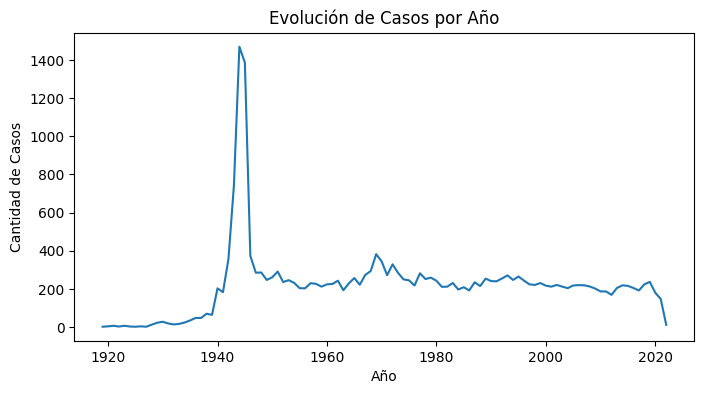

In [ ]:
conteo_por_año = df['Year'].value_counts().reset_index()
conteo_por_año.columns = ['Año', 'Cantidad']

plt.figure(figsize=(8, 4))
sns.lineplot(data=conteo_por_año, x='Año', y='Cantidad')
plt.xlabel('Año')
plt.ylabel('Cantidad de Casos')
plt.title('Evolución de Casos por Año')

Se puede ver un aumento drástico en el período 1940-45, dada la 2da guerra mundial, una tendencia que se mantienen entre 200 y 300 casos hasta fines del 2010 (con un leve incremento a fines de los '60) y una marcada caída a partir del 2020.

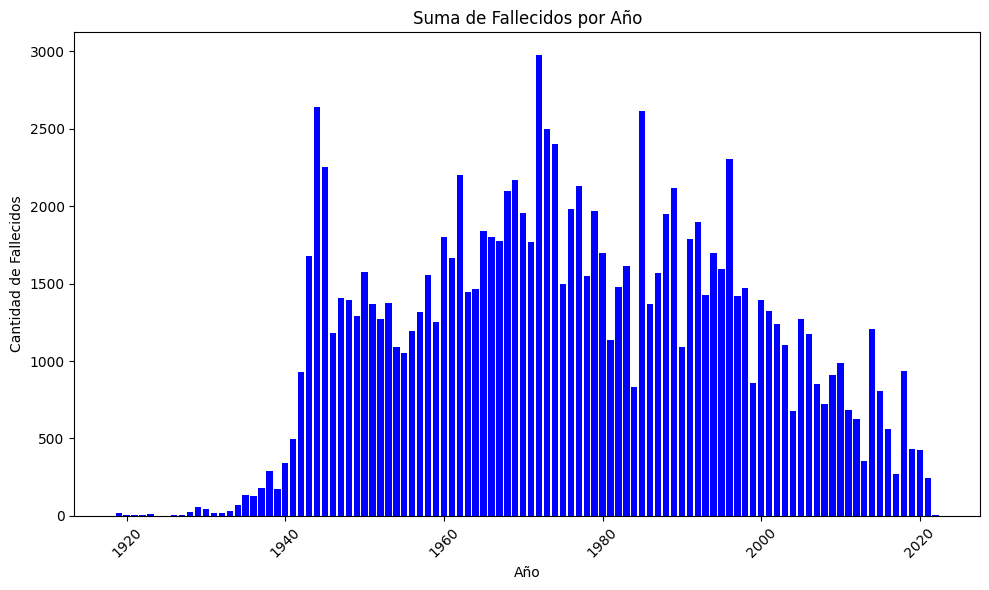

In [ ]:
fatalitiesXyear = df.groupby('Year')['Fatalities'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(fatalitiesXyear.index, fatalitiesXyear.values, color='b')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Fallecidos')
ax.set_title('Suma de Fallecidos por Año')
plt.xticks(rotation=45)
plt.tight_layout()

In [102]:
total_registros = len(df)
total_fallecidos = df['Fatalities'].sum()
total_modelos = df['Aircaft_Model'].nunique()
print(f"La cantidad de accidentes e incidentes registrados son: {total_registros}")
print(f"La cantidad de fallecidos totales registrados son: {total_fallecidos}")
print(f"La cantidad de modelos de aeronaves implicados son: {total_modelos}")

La cantidad de accidentes e incidentes registrados son: 22745
La cantidad de fallecidos totales registrados son: 117003
La cantidad de modelos de aeronaves implicados son: 3491


La cantidad de fallecidos por año muestra una varianza irregular, pero con un pico en los '70 y una disminución a partir de los '80.\
Cabe recordar que hay casos aislados que muy probablemente se deban a vuelos únicos con mayor capacidad de personas a bordo, lo cual hace la diferencia en la mayoría de los casos y un gráfico de éste tipo es demasiado generalizado como para poder marcar una línea clara.

---

*¿Hay algún período en el año donde sean más factibles los sucesos?*\
(visualizamos gráficos que sumen los casos de forma mensual y por día semanal)

Text(0.5, 1.0, 'Cantidad de casos por Día')

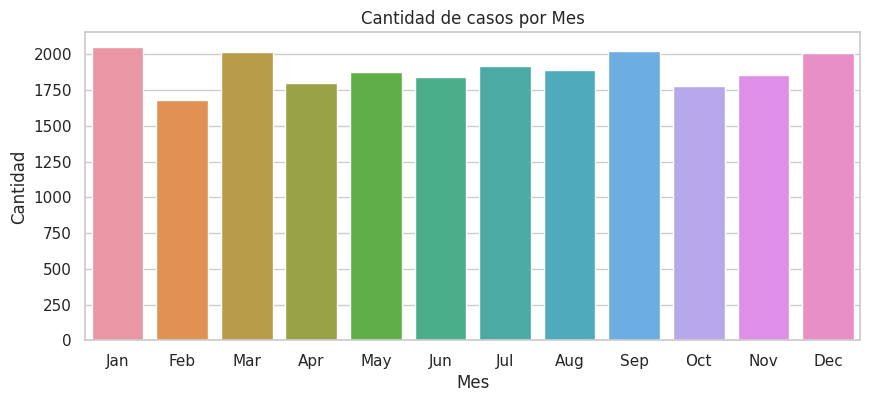

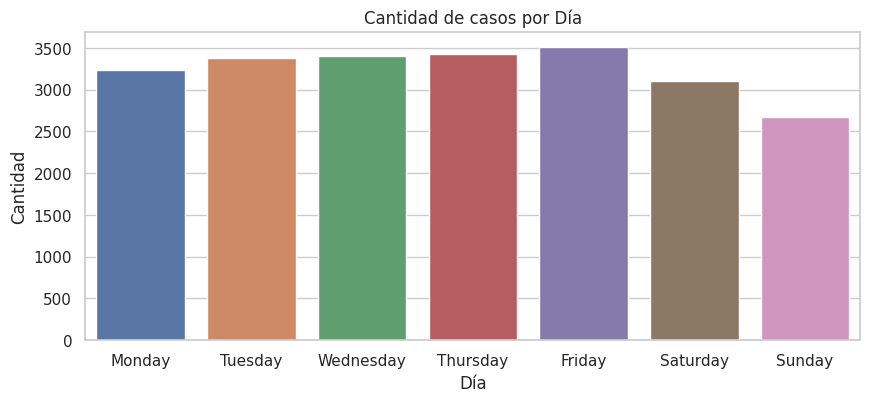

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(x='Month', data=df)

plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Cantidad de casos por Mes')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(x='Day', data=df)

plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.title('Cantidad de casos por Día')

Los meses que más casos registran son Enero, Marzo, Septiembre y Diciembre, aunque no presenta una línea que signifique algún patrón a considerar.\
En cuanto a los días de semana hay una línea bastante marcada de crecimiento durante los días semanales (lunes a viernes) y una caída considerable en sábados y domingos. Es un dato interesante ya que a priori se podría haber considerado que el fin de semana sería donde más casos se registren.

Text(0.5, 1.0, 'Cantidad de casos por Día')

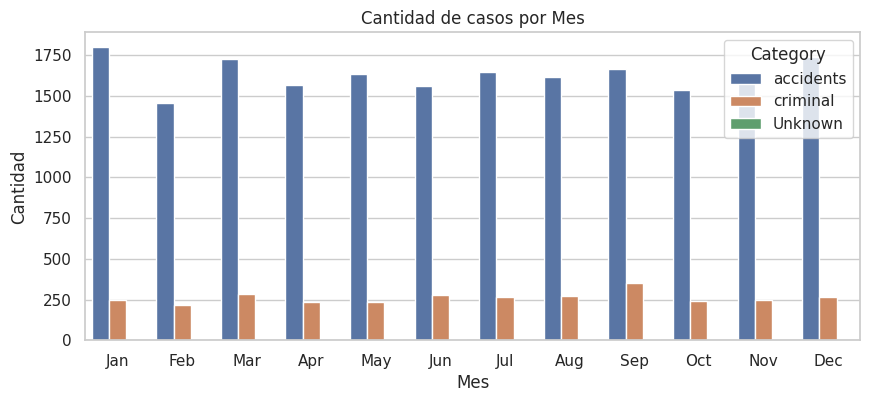

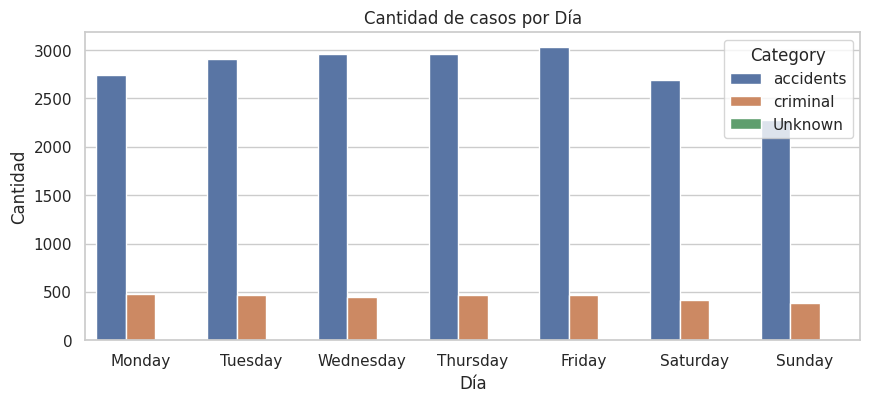

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Month', hue='Category', data=df)

plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Cantidad de casos por Mes')

plt.figure(figsize=(10, 4))
sns.countplot(x='Day', hue='Category', data=df)

plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.title('Cantidad de casos por Día')

Podemos notar que las líneas no marcan mucha diferencia respecto a los primeros gráficos, al menos en la variable 'accidents' que es la que más casos registra.\
En cuanto a 'criminals', tampoco hay una línea o patrón a considerar, está bastante disperso y no deja mucho para analizar.

---

*¿Hay tendencias en los tipos de vuelos, sean domésticos o internacionales? ¿Lo hubo durante los años registrados?*

Se utiliza un gráfico de barras duplicado que categoriza el tipo de vuelo.

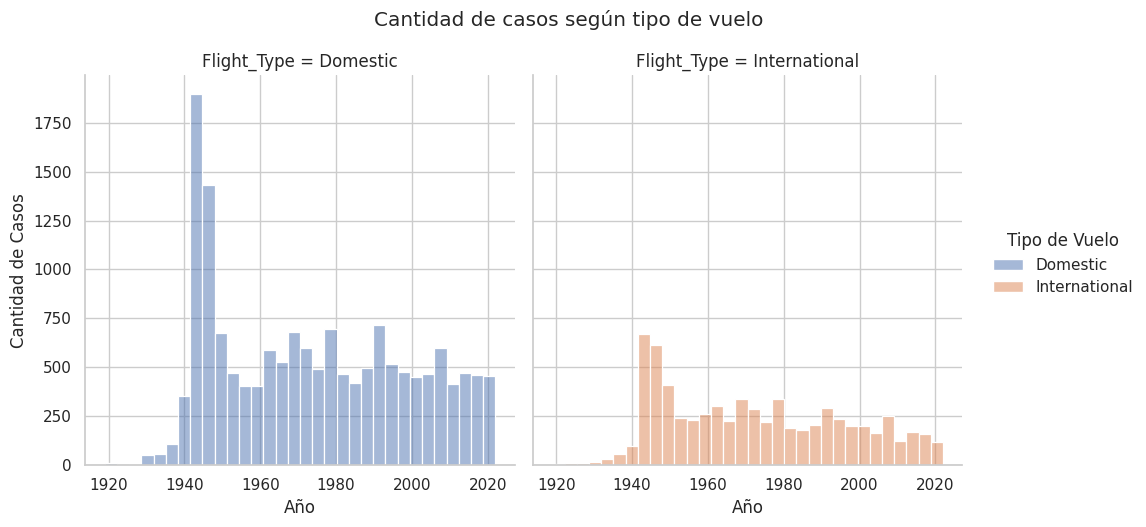

In [ ]:
g = sns.displot(data=df, x="Year", hue="Flight_Type", col="Flight_Type")
g.set_axis_labels("Año", "Cantidad de Casos")
g.fig.suptitle("Cantidad de casos según tipo de vuelo", y=1.05)
g._legend.set_title("Tipo de Vuelo")

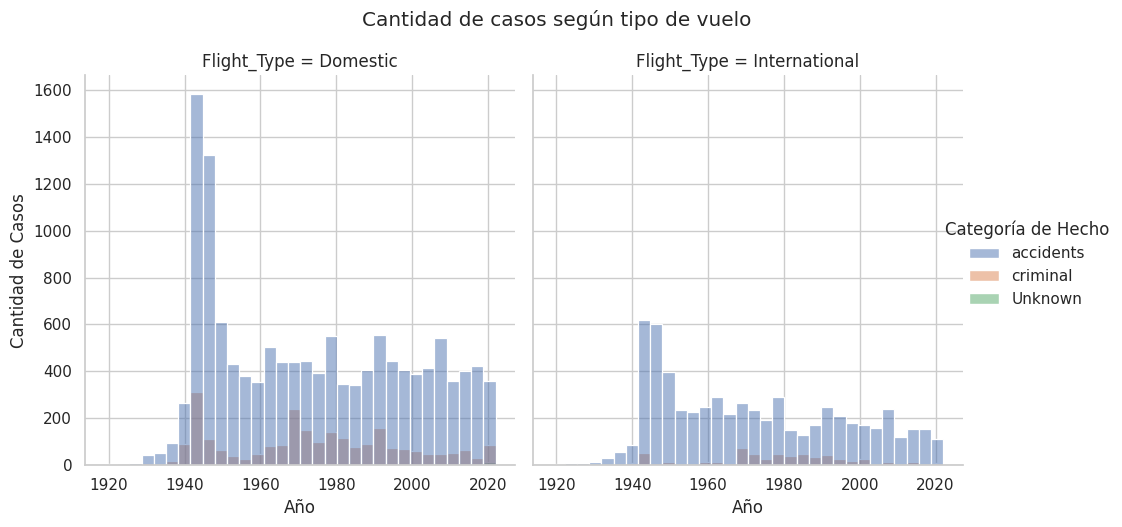

In [ ]:
g = sns.displot(data=df, x="Year", hue="Category", col="Flight_Type")
g.set_axis_labels("Año", "Cantidad de Casos")
g.fig.suptitle("Cantidad de casos según tipo de vuelo", y=1.05)
g._legend.set_title("Categoría de Hecho")

In [ ]:
category_counts = df[['Category', 'Flight_Type']].value_counts()
category_percentages = category_counts / len(df) * 100

category_percentages

Category   Flight_Type  
accidents  Domestic         58.518356
           International    27.434601
criminal   Domestic         11.039789
           International     2.730270
Unknown    Domestic          0.228622
           International     0.048362
dtype: float64

En éstos gráficos podemos ver que los accidentes componen más del 70% del total de los casos y sólo los de tipo de vuelo domésticos significan más de la mitad.\
En cuanto a los hechos criminales con la clara minoría llegando apenas al 11% en los vuelos domésticos.\
En todos los casos, no se detecta una línea de comportamiento.

---

*¿Cómo se constituyen los tipos de daños que sufren las aeronaves?*

Para el siguiente gráfico es necesario especificar descripción de los Tipos de Daños en Aeronaves:

- **Substantial:** daño grave que podría significar un alto coste de reparación.
- **Destroyed:** aeronave destruída.
- **Damaged Beyond Repair:** daños irreparables.
- **Unknown:** desconocido. Campo o registro sin datos.
- **Minor:** daños menores y/o reparables.
- **Missing:** aeronave perdida.

**se utiliza warnings.filterwarnings para ignorar temporalmente la advertencia alrededor de la disposición de la figura.*

<Figure size 1200x800 with 0 Axes>

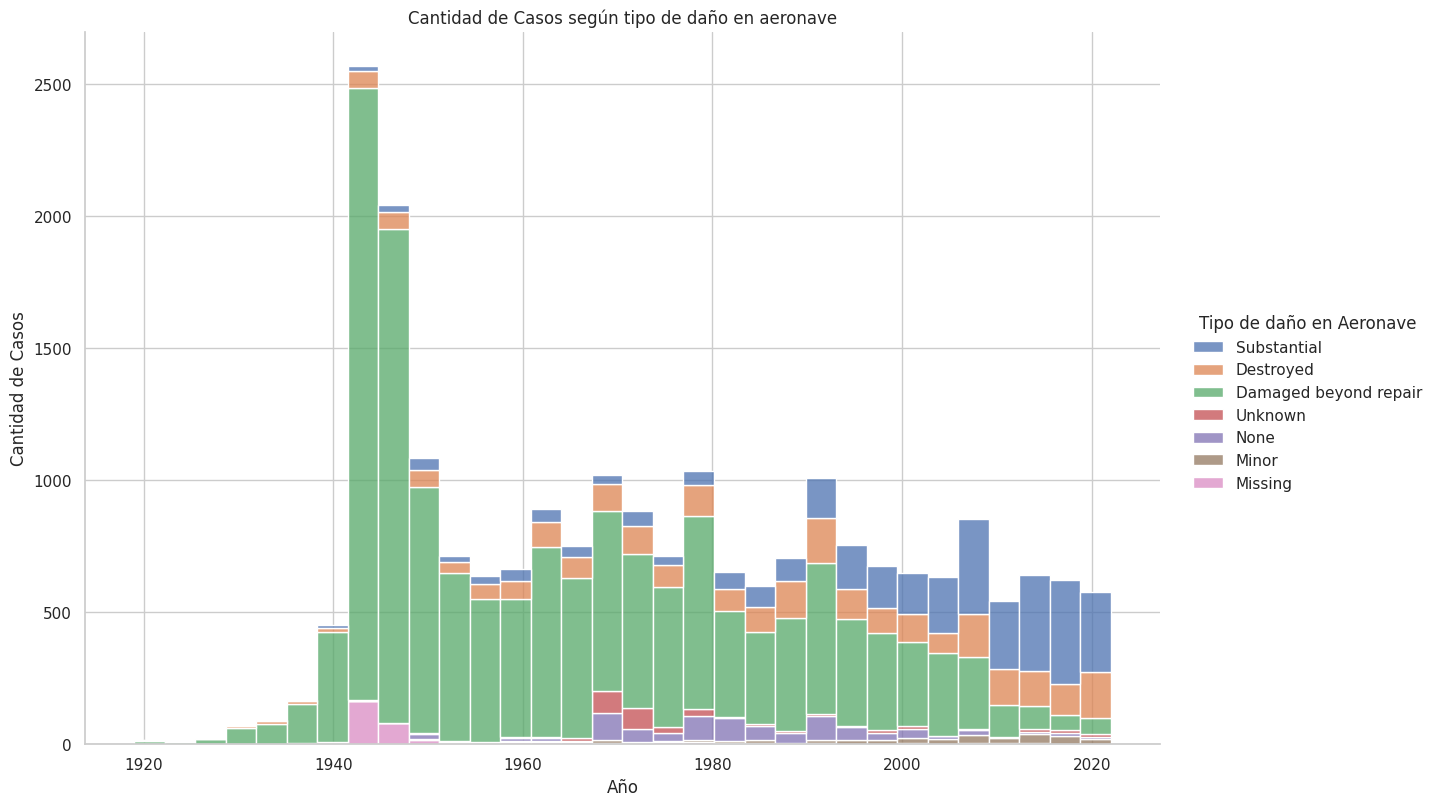

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
g = sns.displot(data=df, x="Year", hue="Aircaft_Damage_Type", multiple="stack", height=8, aspect=1.5, legend=True)
g.set(xlabel="Año", ylabel="Cantidad de Casos", title="Cantidad de Casos según tipo de daño en aeronave")
g._legend.set_title("Tipo de daño en Aeronave")
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
damage_counts = df['Aircaft_Damage_Type'].value_counts()
damage_counts = damage_counts / len(df) * 100

damage_counts

Damaged beyond repair    66.665201
Substantial              14.240492
Destroyed                11.382721
None                      3.376566
Missing                   1.600352
Unknown                   1.490437
Minor                     1.244230
Name: Aircaft_Damage_Type, dtype: float64

Tiene sentido, tratándose de aeronaves, que los daños más severos (irreparable, sustancial y destruída) sean los que componen más del 90% de los casos registrados ya que la probabilidad de un accidente aéreo sin daños es casi inconcebible.\
Aunque se puede ver que a partir de los '80 el porcentaje de daños sustanciales fue creciendo, mientras sucedía lo opuesto con los daños irreparables.\
Considerando también un crecimiento (aunque algo variado) de casos de aeronaves destruídas, podemos considerar que se fueron mejorando, al margen de la baja de cantidad de casos en general, que se mejoraron las medidas para que los daños no sean tan severos.

A continuación filtraremos los 3 casos de daños más severos para compararlos con las columnas 'Category' y 'Survival_Prob'


Text(0.5, 1.0, 'Probabilidad de Supervivencia según Tipo de Accidente y Daño')

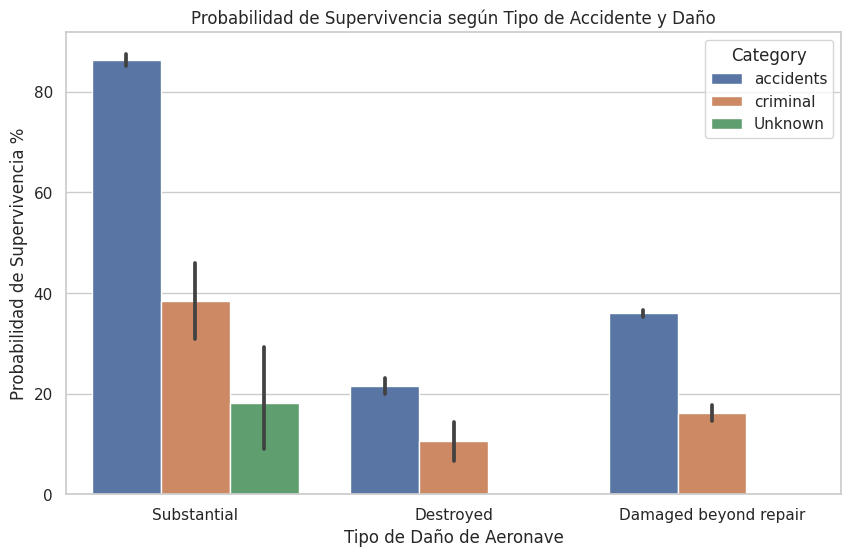

In [104]:
most_damaged = df[df['Aircaft_Damage_Type'].isin(['Substantial', 'Destroyed', 'Damaged beyond repair'])]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Aircaft_Damage_Type', y='Survival_Prob', hue='Category', data=most_damaged)

plt.xlabel('Tipo de Daño de Aeronave')
plt.ylabel('Probabilidad de Supervivencia %')
plt.title('Probabilidad de Supervivencia según Tipo de Accidente y Daño')

La probabilidad de supervivencia es mayor en tipos de daños sustanciales, que si a ello sumamos que en gráficos previos pudimos ver que las últimas décadas la suma de fallecidos bajó y el tipo de daño sustancial aumentó proporcionalmente al descenso de daños irreparables, entonces hablamos de un progreso óptimo en cuando al estudio y desarrollo de aeronaves y sistemas de seguridad.\
También podemos notar que los hechos criminales son los que menor probabilidad de supervivencia registran ya que en ninguno de los casos llega siquiera al 40%.

---

*¿En qué fases de vuelos se dan la mayoría de los casos y cuáles son los tipos de aeronaves más afectadas?*

Se utilizan gráficos de barras horizontales.

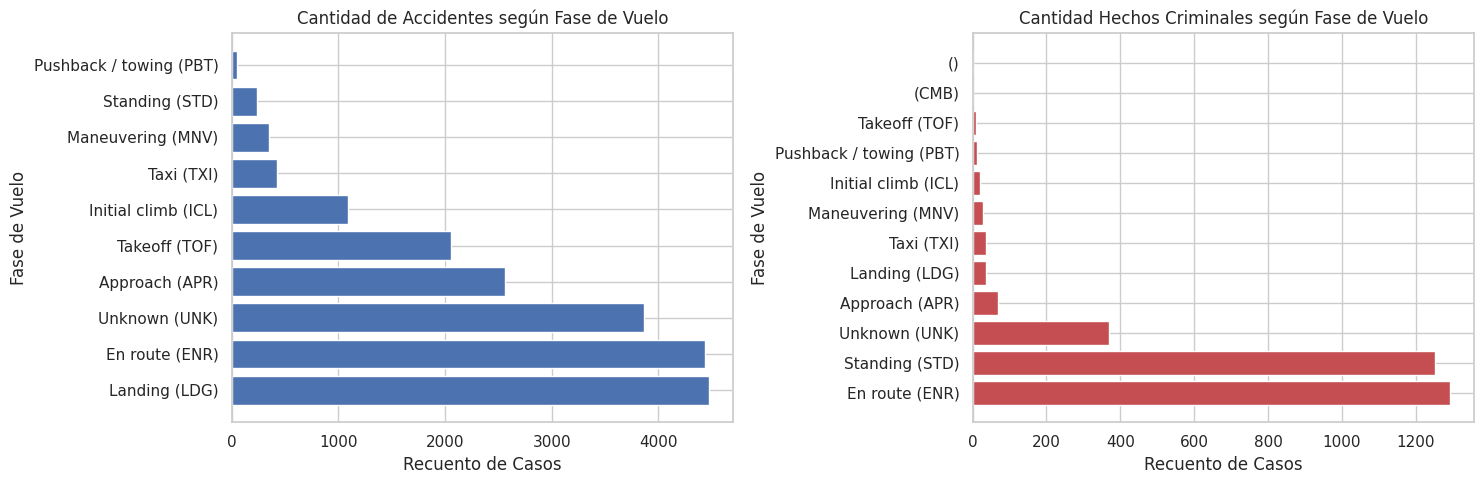

In [ ]:
count_phase = df['Aircraft_Phase'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

count_phase_accidents = df[df['Category'] == 'accidents']['Aircraft_Phase'].value_counts()
ax1.barh(count_phase_accidents.index, count_phase_accidents.values, color='b')
ax1.set_xlabel('Recuento de Casos')
ax1.set_ylabel('Fase de Vuelo')
ax1.set_title('Cantidad de Accidentes según Fase de Vuelo')

count_phase_criminal = df[df['Category'] == 'criminal']['Aircraft_Phase'].value_counts()
ax2.barh(count_phase_criminal.index, count_phase_criminal.values, color='r')
ax2.set_xlabel('Recuento de Casos')
ax2.set_ylabel('Fase de Vuelo')
ax2.set_title('Cantidad Hechos Criminales según Fase de Vuelo')

plt.tight_layout()

En cuanto a los accidenes, la mayoría de los casos se dan en aterrizaje, en arribo o en camino, lo cual da un indicio de fallas técnicas, más aún considerando que el resto de casos que le siguen en cantidad, son despegue y ascenso.\
No obstante, los hechos criminales varían, muestran una distribución mucho más desbalanceada con más tendencia a suceder en camino o en suelo (standing) lo que da la pauta de otras intenciones, que pueden ser llegar a negociaciones o simplemente ir directamente al crimen en si.\
Para ello calcularemos la probabilidad de supervivencia en éstos hechos puntuales.

In [ ]:
criminal_data = df[df['Category'] == 'criminal']

count_phase_criminal = criminal_data['Aircraft_Phase'].value_counts().reset_index()
count_phase_criminal.columns = ['Aircraft_Phase', 'Count']

grouped_data_criminal = criminal_data.groupby('Aircraft_Phase').agg({'Fatalities': 'sum', 'Survival_Prob': 'mean'}).reset_index()

result = pd.merge(count_phase_criminal, grouped_data_criminal, on='Aircraft_Phase')

print(result)

             Aircraft_Phase  Count  Fatalities  Survival_Prob
0            En route (ENR)   1293        6940      58.849188
1            Standing (STD)   1253         184       9.260974
2             Unknown (UNK)    368         301      42.187500
3            Approach (APR)     70         999      31.285714
4             Landing (LDG)     37         102      49.837838
5                Taxi (TXI)     36          24      51.361111
6         Maneuvering (MNV)     29         111      23.068966
7       Initial climb (ICL)     21         522      25.904762
8   Pushback / towing (PBT)     13           0      30.769231
9             Takeoff (TOF)     10          32      41.000000
10                    (CMB)      1           0       0.000000
11                       ()      1           9       0.000000


Con ésta última visualización podermos ver que los hechos criminales en tierra son los que menos probabilidades de supervivencia muestran y los casos que se dan en ruta, son los que mayor fatalidades suman, pero con mayor probabilidad de supervivencia. Ésto se da porque son casos con mayor cantidad de gente a bordo respecto al resto de las fases de vuelo.

A continuación seguimos con el desarrollo en la 2da variable categórica propuesta, los tipos de aeronaves.

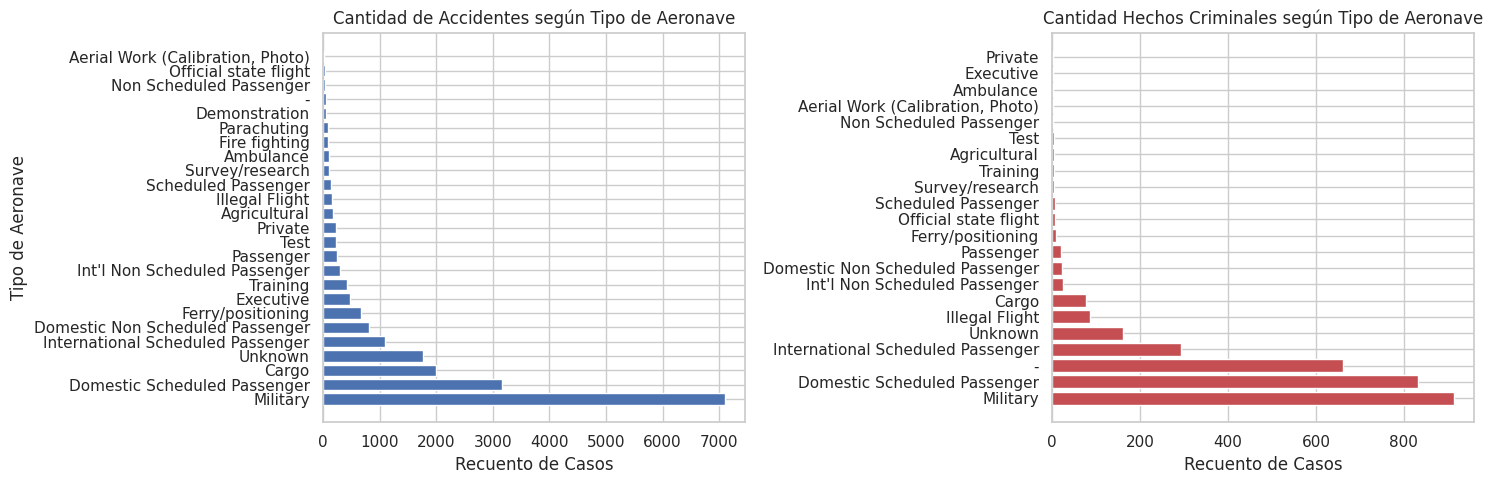

In [ ]:
count_nature = df['Aircaft_Nature'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

count_nature_accidents = df[df['Category'] == 'accidents']['Aircaft_Nature'].value_counts()
ax1.barh(count_nature_accidents.index, count_nature_accidents.values, color='b')
ax1.set_xlabel('Recuento de Casos')
ax1.set_ylabel('Tipo de Aeronave')
ax1.set_title('Cantidad de Accidentes según Tipo de Aeronave')

count_nature_criminal = df[df['Category'] == 'criminal']['Aircaft_Nature'].value_counts()
ax2.barh(count_nature_criminal.index, count_nature_criminal.values, color='r')
ax2.set_xlabel('Recuento de Casos')
ax2.set_title('Cantidad Hechos Criminales según Tipo de Aeronave')

plt.tight_layout()

Si bien hay una variación, más allá de la cantidad de los casos, en el tipo de aeronave más elegida al momento de un hecho criminal, los casos que omiten a las militares (por obvias razones) son las aeronaves de transporte de pasajeros. Lo cual indica la seriedad del crimen, hay una tendencia sobre la cantidad de personas a bordo afectadas.\
Intentaremos con otro gráfico que nos muestre otra perspectiva sobre los hechos criminales en relación al tipo de daño de la aeronave a través de las distintas décadas.

Text(0, 0.5, 'Tipo de Hecho Criminal')

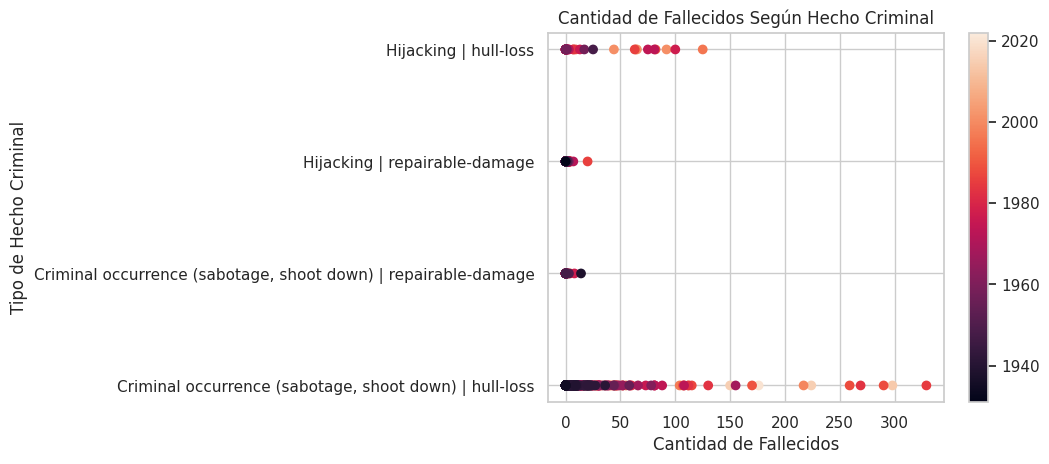

In [ ]:
criminal_filter = df[df['Incident_Category'].isin(['Criminal occurrence (sabotage, shoot down) | hull-loss',
                                               'Criminal occurrence (sabotage, shoot down) | repairable-damage',
                                               'Hijacking | repairable-damage',
                                               'Hijacking | hull-loss'])]

fig, ax = plt.subplots()
mapeo_colores = ax.scatter(criminal_filter['Fatalities'], criminal_filter['Incident_Category'], c=criminal_filter['Year'])
fig.colorbar(mapeo_colores)
ax.set_title('Cantidad de Fallecidos Según Hecho Criminal')
ax.set_xlabel('Cantidad de Fallecidos')
ax.set_ylabel('Tipo de Hecho Criminal')

Con éste último gráfico podemos notar claramente que la mayor cantidad de fallecidos se da por pérdida del casco, o sea, el daño más severo en las aeronaves.

Text(0.5, 1.0, 'Cantidad de Fallecidos Según Hecho Criminal')

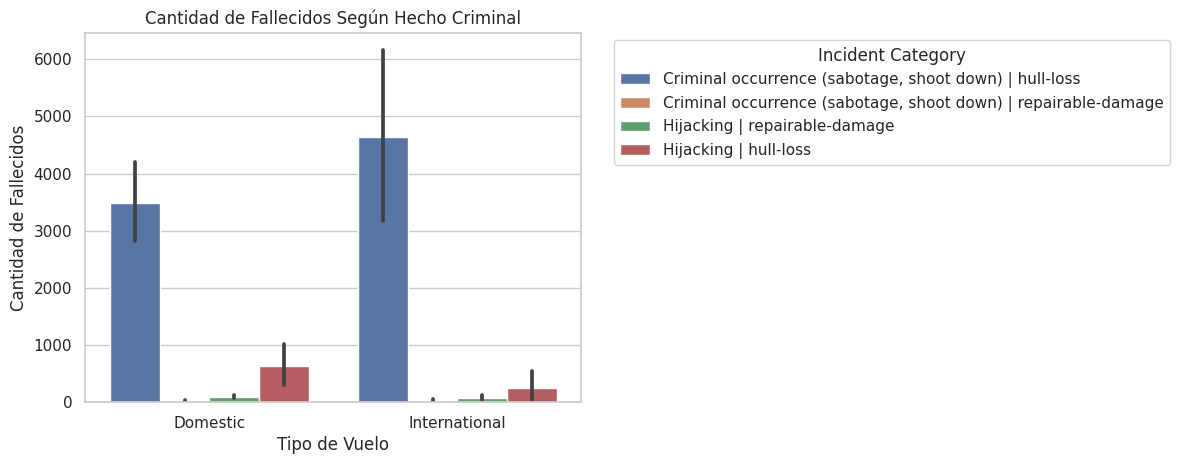

In [ ]:
sns.barplot(x="Flight_Type", y="Fatalities", hue= 'Incident_Category', estimator=sum, data=criminal_filter)
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Cantidad de Fallecidos')
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Cantidad de Fallecidos Según Hecho Criminal')

En éste último gráfico podemos ver que la mayoría de los casos de hecho criminal se da en vuelos internacionales, los cuales se consideran según gráficos anteriores los vuelos militares (en su mayoría) y de pasajeros.

---

*¿Tiene relación la antigüedad de la aeronave con los daños más severos y/o destrucciones, en cuanto a registros de accidentes?*

Primero, contabilizamos la cantidad de casos según daño.

In [ ]:
df['Aircaft_Damage_Type'].value_counts()

Damaged beyond repair    15163
Substantial               3239
Destroyed                 2589
None                       768
Missing                    364
Unknown                    339
Minor                      283
Name: Aircaft_Damage_Type, dtype: int64

Luego utilizamos un gráfico sns.boxplot que nos permitirá ver si la antigüedad de las aeronaves incide o no sobre los casos de accidentes y los daños ocasionados. Se despliega 2 veces el gráfico con distintas visualizaciones:
- La primera es más generalizada con un filtrado de los 3 tipos de daños más graves, que a su vez son los que más se repiten (Substantial, Destoyed, Damaged Beyond Repair).
- La segunda considera además las categorías de accidentes, según columna 'Incident_Category', que no incluyan secuestros o hechos criminales.

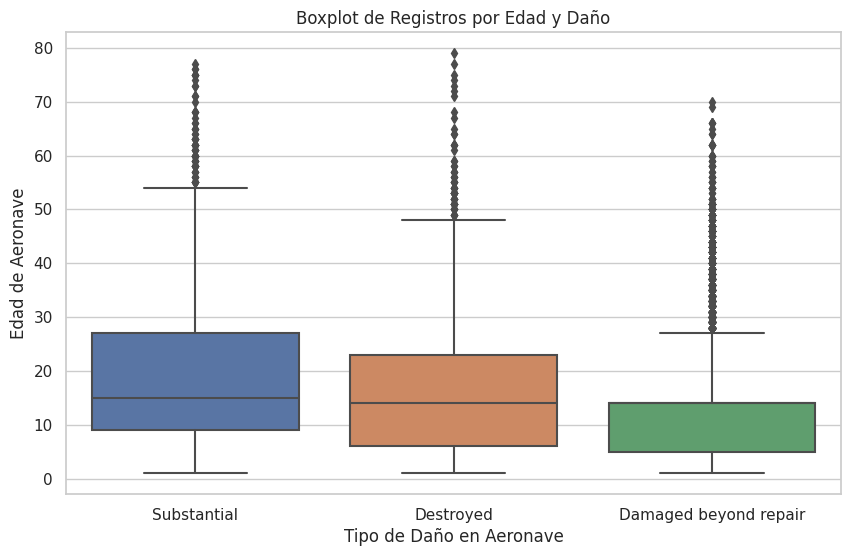

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aircaft_Damage_Type', y='Aircraft_Age', data=most_damaged, orient='v')
plt.xlabel('Tipo de Daño en Aeronave')
plt.ylabel('Edad de Aeronave')
plt.title('Boxplot de Registros por Edad y Daño')
plt.show()

En éste gráfico se puede ver que la mayoría de los casos se concentran en aeronaves que no llegan a los 30 años de antigüedad, no obstante aquellas que están en menor promedio (15 a 5 años) son las que se ubican en daños irreparables, pero a su vez es el tipo de daño que más outliers presenta, entre los 30 y 70 años de antigüedad.

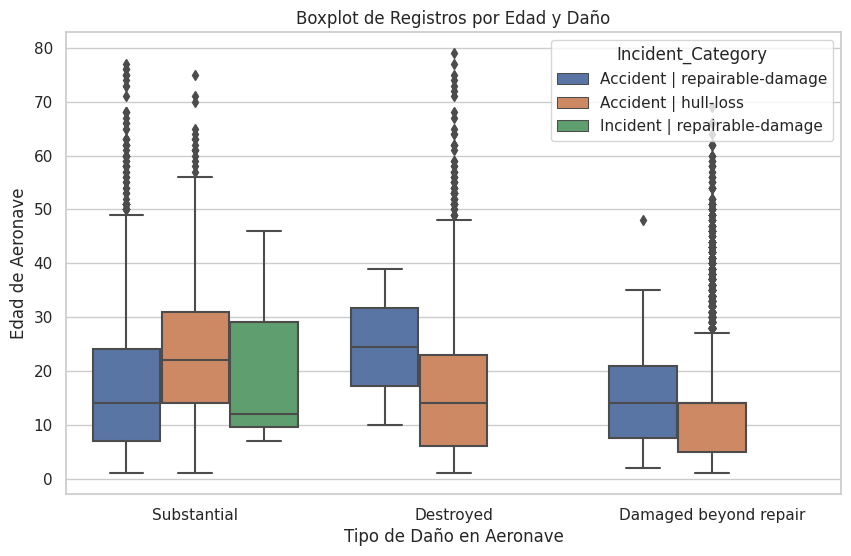

In [ ]:
most_damaged2 = df[
    (df['Aircaft_Damage_Type'].isin(['Substantial', 'Destroyed', 'Damaged beyond repair'])) &
    (df['Incident_Category'].isin(['Accident | repairable-damage', 'Accident | hull-loss',
                                    'Incident | repairable-damage']))]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Aircaft_Damage_Type', y='Aircraft_Age', hue='Incident_Category', data=most_damaged2, orient='v')
plt.xlabel('Tipo de Daño en Aeronave')
plt.ylabel('Edad de Aeronave')
plt.title('Boxplot de Registros por Edad y Daño')
plt.show()

En éste 2do gráfico podemos notar que los únicos casos de daños reparables concentran sus datos entre 10 y 29 años, con una línea media en gráfico que no llega a los 15 años.\
De todas maneras el resto de los datos, si bien se concentran en su mayoría por debajo de los 30 años, al presentar muchos outliers es difícil poder llegar a una conclusión certera, lo más probable es que no haya una correlación fuerte entre los accidentes y las edades de las aeronaves.

*¿Cuáles son los modelos de aeronaves de mayor incidencia y cuántos valores únicos posee el dataset según columna 'Aircaft_Model'?*

- se utilizan funciones 'unique()' y 'value_counts()'.
- dada la cantidad de valores únicos contabilizados con la función 'nunique()', se utiliza un top 20 de mayor cantidad de repeticiones.

In [ ]:
df['Aircaft_Model'].nunique()

3491

In [ ]:
df['Aircaft_Model'].value_counts().head(20)

Douglas C-47-DL (DC-3)                      455
Antonov An-2R                               356
Junkers Ju-52/3m                            335
Douglas Dakota III (DC-3)                   255
de Havilland Canada DHC-6 Twin Otter 300    248
Cessna 208B Grand Caravan                   231
Consolidated PBY-5A Catalina                212
Douglas C-47A-90-DL (DC-3)                  202
Douglas C-47 (DC-3)                         199
Douglas Dakota IV (DC-3)                    198
Douglas C-47A-25-DK (DC-3)                  196
Antonov An-2                                174
Douglas C-47A-80-DL (DC-3)                  172
Lisunov Li-2                                158
Beechcraft 200 Super King Air               151
Consolidated PBY-5 Catalina                 150
Douglas DC-3                                123
Antonov An-26                               123
Boeing 727                                  121
Douglas C-47A-20-DK (DC-3)                  118
Name: Aircaft_Model, dtype: int64

Text(0.5, 1.0, 'Top 20 de Aeronaves Según Modelo')

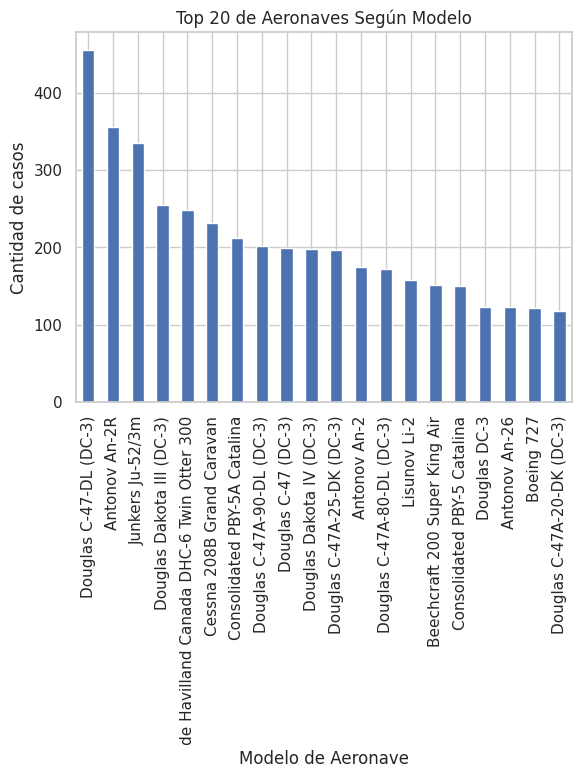

In [ ]:
top20_acm = df['Aircaft_Model'].value_counts().head(20)
top20_acm.plot.bar()

plt.xlabel('Modelo de Aeronave')
plt.ylabel('Cantidad de casos')
plt.title('Top 20 de Aeronaves Según Modelo')

Sobre éste top 20 obtenido intentaremos obtener el modelo de aeronave que menor promedio tenga de fallecidos según personas a bordo.

- se utilizan funciones *.sum()* para las columnas 'Onboard_Total' y 'Fatalities'.
- se consideran sólo los modelos de aeronaves según el top 20 obtenido previamente.

In [ ]:
data = {
    'Aircaft_Model': top20_acm.index,
    'Onboard_Total_Sum': [df[df['Aircaft_Model'] == model]['Onboard_Total'].sum() for model in top20_acm.index],
    'Fatalities_Sum': [df[df['Aircaft_Model'] == model]['Fatalities'].sum() for model in top20_acm.index]
}

df_top20 = pd.DataFrame(data)
df_top20

,Aircaft_Model,Onboard_Total_Sum,Fatalities_Sum
0,Douglas C-47-DL (DC-3),2275,1249
1,Antonov An-2R,677,276
2,Junkers Ju-52/3m,1528,599
3,Douglas Dakota III (DC-3),803,418
4,de Havilland Canada DHC-6 Twin Otter 300,2484,1004
5,Cessna 208B Grand Caravan,1353,292
6,Consolidated PBY-5A Catalina,915,269
7,Douglas C-47A-90-DL (DC-3),927,588
8,Douglas C-47 (DC-3),1800,797
9,Douglas Dakota IV (DC-3),740,366


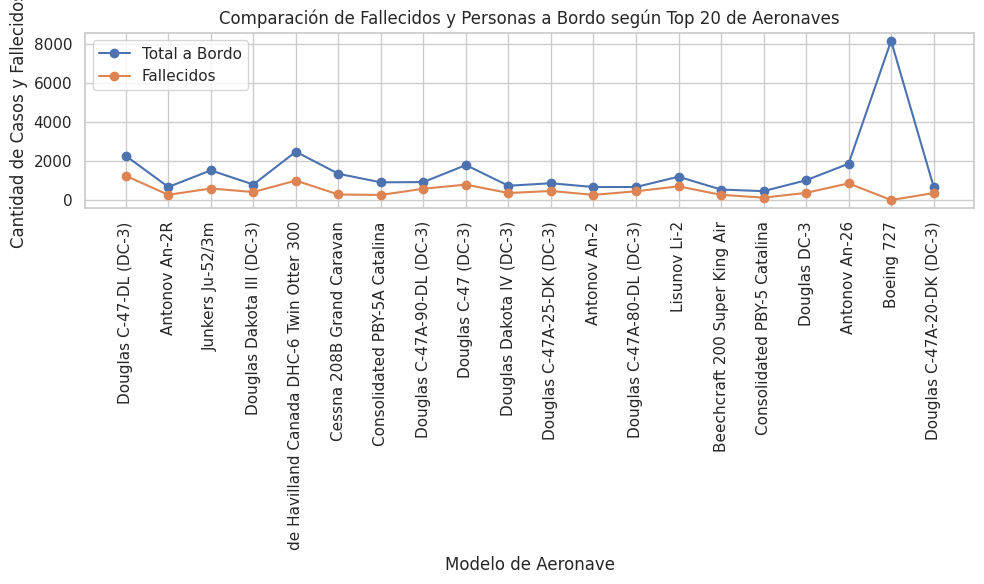

In [105]:
plt.figure(figsize=(10, 6))

plt.plot(df_top20['Aircaft_Model'], df_top20['Onboard_Total_Sum'], marker='o', label='Total a Bordo')
plt.plot(df_top20['Aircaft_Model'], df_top20['Fatalities_Sum'], marker='o', label='Fallecidos')

plt.xlabel('Modelo de Aeronave')
plt.ylabel('Cantidad de Casos y Fallecidos')
plt.title('Comparación de Fallecidos y Personas a Bordo según Top 20 de Aeronaves')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Creamos una lista para visualizar la aeronave con mayor cantidad de fallecidos:

In [ ]:
df_top20[['Aircaft_Model', 'Onboard_Total_Sum', 'Fatalities_Sum']].sort_values(by='Fatalities_Sum', ascending=False)

,Aircaft_Model,Onboard_Total_Sum,Fatalities_Sum
0,Douglas C-47-DL (DC-3),2275,1249
4,de Havilland Canada DHC-6 Twin Otter 300,2484,1004
17,Antonov An-26,1868,862
8,Douglas C-47 (DC-3),1800,797
13,Lisunov Li-2,1203,710
2,Junkers Ju-52/3m,1528,599
7,Douglas C-47A-90-DL (DC-3),927,588
10,Douglas C-47A-25-DK (DC-3),868,473
12,Douglas C-47A-80-DL (DC-3),675,457
3,Douglas Dakota III (DC-3),803,418


Veamos éstos resultados en promedios:

In [ ]:
df_top20['Average'] = df_top20['Fatalities_Sum'] / df_top20['Onboard_Total_Sum']
df_top20[['Aircaft_Model', 'Onboard_Total_Sum', 'Fatalities_Sum', 'Average']].sort_values(by='Average', ascending=False)

,Aircaft_Model,Onboard_Total_Sum,Fatalities_Sum,Average
12,Douglas C-47A-80-DL (DC-3),675,457,0.677037
7,Douglas C-47A-90-DL (DC-3),927,588,0.634304
13,Lisunov Li-2,1203,710,0.590191
0,Douglas C-47-DL (DC-3),2275,1249,0.549011
10,Douglas C-47A-25-DK (DC-3),868,473,0.544931
19,Douglas C-47A-20-DK (DC-3),694,365,0.525937
3,Douglas Dakota III (DC-3),803,418,0.520548
14,Beechcraft 200 Super King Air,545,276,0.506422
9,Douglas Dakota IV (DC-3),740,366,0.494595
17,Antonov An-26,1868,862,0.461456


Podemos ver que los modelos Douglas son los más implicados en la suma de los casos y fatalidades. También podemos ver que de Havilland Canada es el 2do con más fallecidos, pero dada la cantidad de pasajeros a bordo, se ubica 13vo en promedios de fallecidos.\
El caso Boeing 727 es el es el que más personas a bordo sumó en los registros, pero de un promedio de fallecidos tan bajo que no llega ni al 0,01%.

---


*En base a los modelos de aeronave de mayor incidencia, ¿cuáles son los tipos de accidentes/incidentes y los tipos de vuelos?*

Se puede ver claramente que si bien el Douglas C-47-DL (DC-3) es el modelo de aeronave que más casos registra y mayor cantidad de fallecidos suma, el Boeing 727 es el que más personas a bordo suma y el que menor cantidad de fallecidos posee, ya sea en suma como en promedio. Seguiremos analizando éstos casos en particular por intermedio de la 5ta pregunta planteada:

- ¿Cuáles son los tipos de accidentes o incidentes?
- ¿Cuáles son los tipos de vuelos?

In [ ]:
filtro_B727 = df[df['Aircaft_Model'] == 'Boeing 727']
filtro_B727 = filtro_B727.sort_values(by='Onboard_Total', ascending=False)
print(filtro_B727[['Aircaft_Model', 'Onboard_Total']])

                     Aircaft_Model  Onboard_Total
Aircaft_Registration                             
NaN                     Boeing 727            157
NaN                     Boeing 727            152
NaN                     Boeing 727            138
NaN                     Boeing 727            136
NaN                     Boeing 727            136
NaN                     Boeing 727            132
NaN                     Boeing 727            132
NaN                     Boeing 727            131
NaN                     Boeing 727            131
NaN                     Boeing 727            130
NaN                     Boeing 727            126
NaN                     Boeing 727            126
NaN                     Boeing 727            125
NaN                     Boeing 727            123
NaN                     Boeing 727            120
NaN                     Boeing 727            120
NaN                     Boeing 727            112
NaN                     Boeing 727            111


In [ ]:
filtro_DC3 = df[df['Aircaft_Model'] == 'Douglas C-47-DL (DC-3)']
filtro_DC3 = filtro_DC3.sort_values(by='Onboard_Total', ascending=False)
print(filtro_DC3[['Aircaft_Model', 'Onboard_Total']])

                               Aircaft_Model  Onboard_Total
Aircaft_Registration                                       
FAH-301               Douglas C-47-DL (DC-3)             40
HK-1202               Douglas C-47-DL (DC-3)             36
HR-SAH                Douglas C-47-DL (DC-3)             35
N61350                Douglas C-47-DL (DC-3)             35
HK-153                Douglas C-47-DL (DC-3)             34
YV-C-AKE              Douglas C-47-DL (DC-3)             34
CCCP-L1204            Douglas C-47-DL (DC-3)             34
JA5018                Douglas C-47-DL (DC-3)             33
HI-6                  Douglas C-47-DL (DC-3)             32
TG-AHA                Douglas C-47-DL (DC-3)             31
42-5677               Douglas C-47-DL (DC-3)             31
YV-C-AVU              Douglas C-47-DL (DC-3)             31
N14273                Douglas C-47-DL (DC-3)             29
HK-109                Douglas C-47-DL (DC-3)             29
2055                  Douglas C-47-DL (D

Procedemos a graficar las diferencias entre tipos de accidentes o incidentes y tipos de vuelos entre ambas aeronaves:

Text(0.5, 1.0, 'Tipo de Incidentes - Boeing 727')

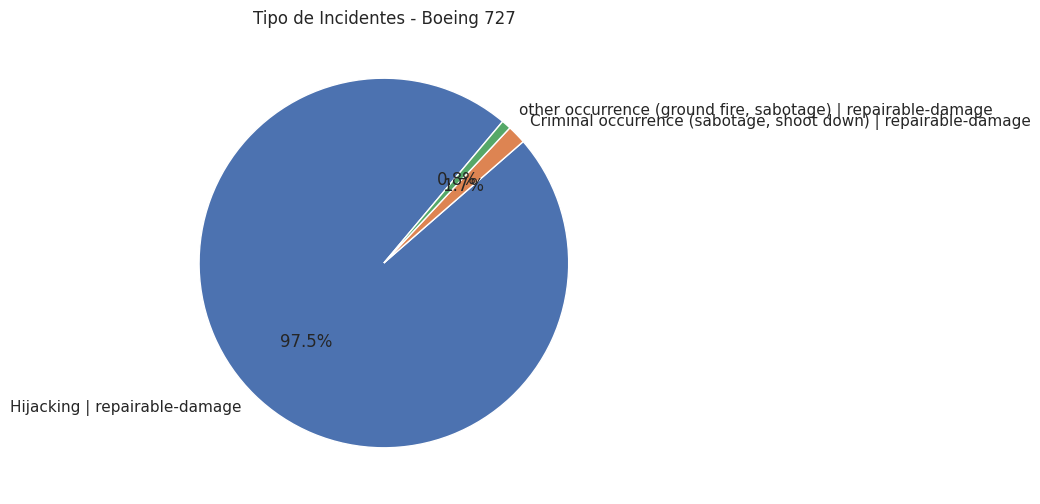

In [ ]:
data1 = filtro_B727['Incident_Category'].value_counts()
labels = data1.index

plt.figure(figsize=(10, 6))
plt.pie(data1, labels=labels, autopct='%1.1f%%', startangle=50)
plt.title('Tipo de Incidentes - Boeing 727')

Text(0.5, 1.0, 'Tipo de Incidentes - Douglas (DC-3)')

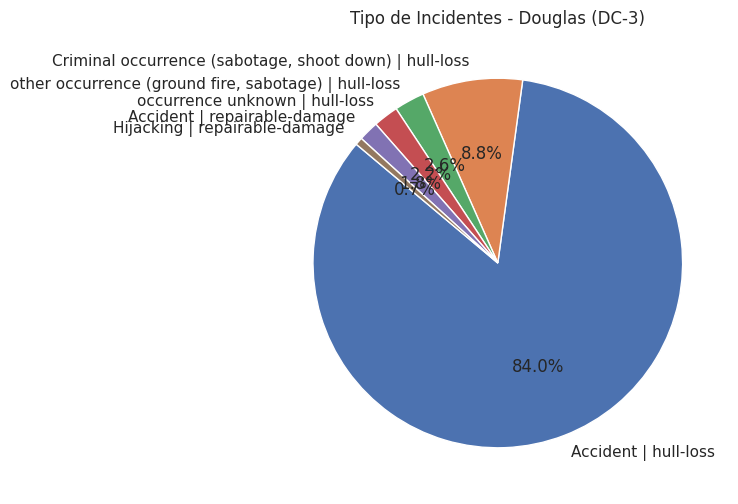

In [ ]:
data2 = filtro_DC3['Incident_Category'].value_counts()
labels = data2.index

plt.figure(figsize=(10, 6))
plt.pie(data2, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Tipo de Incidentes - Douglas (DC-3)')

El Boeing 727 presenta daños reparables en la mayoría de los casos y sus registros son del 97,5% secuestros.\
El Douglas (DC-3) presenta pérdida de casco en el 97,6% y son casos accidentales en más del 85%.\
Lo que significa que el Boeing 727 figura en los registros porque hay una preferencia elevada hacia los secuestros, sin daños severos.

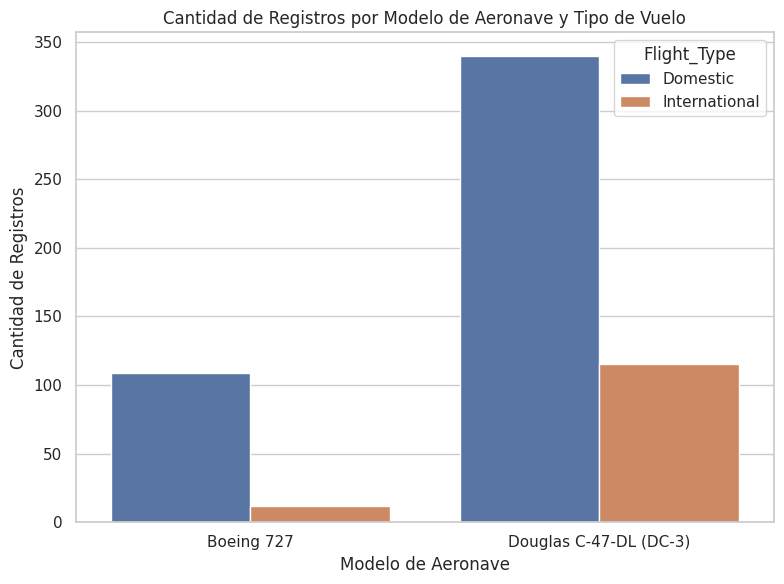

In [ ]:
filtros_concat = pd.concat([filtro_B727, filtro_DC3])

plt.figure(figsize=(8, 6))
sns.countplot(x='Aircaft_Model', hue='Flight_Type', data=filtros_concat)
plt.xlabel('Modelo de Aeronave')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Modelo de Aeronave y Tipo de Vuelo')
plt.tight_layout()
plt.show()

Por último podemos ver que el Boeing 727 registra menos casos en ambos ámbitos y ésto se debe a que es una aeronave para transporte de pasajeros con capacidad que superan las 100 butacas, mientras que el Douglas C-47-DL (DC-3) es un avión militar con capacidades que no llegan a 20-30 personas a bordo, desarrollado y utilizado durante la 2da guerra mundial.